In [1]:
import bs4
import matplotlib.pyplot as plt
import numpy
import os
import numpy as np
import pandas as pd
import cv2
from zipfile import ZipFile

In [2]:
# os.chdir('../')
os.getcwd()

'/media/ubuntu/disk'

In [3]:
os.chdir('/media/ubuntu/disk/')

In [3]:
os.chdir('ohrc_calibrated')

In [4]:
ohrc_dir = os.listdir()

In [5]:
ohrc_dir

['ch2_ohr_ncp_20210405T0640233469_d_img_d18',
 'ch2_ohr_ncp_20200827T0226453039_d_img_d18',
 'ch2_ohr_ncp_20200825T1127278043_d_img_d18',
 'ch2_ohr_ncp_20210405T0640233869_d_img_d18',
 'ch2_ohr_ncp_20210331T2033243734_d_img_d18',
 'ch2_ohr_ncp_20200827T0030107497_d_img_d18',
 'ch2_ohr_ncp_20220321T0525226030_d_img_d18',
 'ch2_ohr_ncp_20211026T1929365546_d_img_d18',
 'ch2_ohr_ncp_20220321T0525226107_d_img_d18',
 'ch2_ohr_ncp_20210405T0640233869_d_img_d32',
 'ch2_ohr_ncp_20210405T1606537227_d_img_d18',
 'ch2_ohr_ncp_20200825T1716291272_d_img_d18',
 'ch2_ohr_ncp_20200824T1003365280_d_img_d18',
 'ch2_ohr_ncp_20210401T2200364910_d_img_d18',
 'ch2_ohr_ncp_20210405T1606536730_d_img_d18',
 'ch2_ohr_ncp_20200825T1322594314_d_img_d18',
 'ch2_ohr_ncp_20200229T0739312111_d_img_d18',
 'ch2_ohr_ncp_20210405T0442095110_d_img_d18',
 'ch2_ohr_ncp_20200826T0853204550_d_img_d18',
 'ch2_ohr_ncp_20210402T0155096873_d_img_d18',
 'ch2_ohr_ncp_20211023T0027462822_d_img_d18',
 'ch2_ohr_ncp_20200827T0423073950_

In [18]:
# for dir_ in ohrc_dir:
#     # loading the temp.zip and creating a zip object
#     with ZipFile(dir_, 'r') as zObject:
#         loc = os.getcwd() + dir_[:-4]

#         # Extracting all the members of the zip 
#         # into a specific location.
#         zObject.extractall(
#             path=os.getcwd() + '/' + dir_[:-4])
    



In [28]:
print(os.getcwd())
os.chdir("../")

/media/ubuntu/disk/ohrc_calibrated


In [20]:
# os.chdir("disk")
# f = open("tmc_loc1.txt", "w")

In [20]:
os.chdir('ohrc_calibrated')

In [19]:
os.chdir("../../")


In [6]:
ohrc_dir=ohrc_dir[:-1]

In [29]:
print(os.getcwd())

/media/ubuntu/disk


In [21]:
#data = {'ohrc':, 'tmc_cropping':}
ohrc=[]
tmc_cropping = []
#pd.DataFrame()

In [22]:

print(os.getcwd())

for dir_ in ohrc_dir:
    print(dir_)
    str_ = dir_ + '/data/calibrated/'+ dir_[12:20]
    xml_loc = str_+'/'+ dir_ + '.xml'
#     print(xml_loc)
    
    with open(xml_loc, 'r') as xml_file:
        contents = xml_file.read()

    soup = bs4.BeautifulSoup(contents, 'lxml')
#     print(soup.prettify())
    lat = np.zeros((2, 2))
    lon = np.zeros((2, 2))
    lat[0, 0] = float(soup.find_all('isda:upper_left_latitude')[1].text)
    lat[0, 1] = float(soup.find_all('isda:upper_right_latitude')[1].text)
    lat[1, 0] = float(soup.find_all('isda:lower_left_latitude')[1].text)
    lat[1, 1] = float(soup.find_all('isda:lower_right_latitude')[1].text)
    
    lon[0, 0] = float(soup.find_all('isda:upper_left_longitude')[1].text)
    lon[0, 1] = float(soup.find_all('isda:upper_right_longitude')[1].text)
    lon[1, 0] = float(soup.find_all('isda:lower_left_longitude')[1].text)
    lon[1, 1] = float(soup.find_all('isda:lower_right_longitude')[1].text)

    os.chdir('../dir_2021/')
    csv_folders = os.listdir()
    
    for csv_folder in csv_folders:
        print(os.getcwd())
        os.chdir(csv_folder)
        csv_files = os.listdir()
        print(csv_folder)
        print('########################')
        for csv in csv_files:
            if (csv[-3:] == 'csv') and ('ncn' in csv):
                df = pd.read_csv(csv)
                df['ul_lon_difference'] = df['Longitude'] - lon[0, 0]
                df['ur_lon_difference'] = df['Longitude'] - lon[0, 1]
                df['ll_lon_difference'] = df['Longitude'] - lon[1, 0]
                df['lr_lon_difference'] = df['Longitude'] - lon[1, 1]

                df['ul_lat_difference'] = df['Latitude'] - lat[0, 0]
                df['ur_lat_difference'] = df['Latitude'] - lat[0, 1]
                df['ll_lat_difference'] = df['Latitude'] - lat[1, 0]
                df['lr_lat_difference'] = df['Latitude'] - lat[1, 1]

                if ((not df[abs(df['ul_lon_difference']) < 0.05].empty) and (not df[abs(df['ul_lat_difference']) < 0.05].empty) and (not df[abs(df['ur_lon_difference']) < 0.05].empty) and (not df[abs(df['ur_lat_difference']) < 0.05].empty) and (not df[abs(df['ll_lon_difference']) < 0.05].empty) and (not df[abs(df['ll_lat_difference']) < 0.05].empty) and (not df[abs(df['lr_lon_difference']) < 0.05].empty) and (not df[abs(df['lr_lat_difference']) < 0.05].empty)):
#                         f.write('\"/ch2/protected/downloadData/POST_OD/isda_archive/ch2_bundle/cho_bundle/nop/tmc_collection/data/calibrated/'+csv_folder+csv[:-4]+'.zip?tmc2\"\n')
                          ohrc.append(dir_)
                          tmc_cropping.append(csv[:-14])
#                           print(csv[:-14]) 
                elif((not df[abs(df['ul_lon_difference']) < 0.05].empty) and (not df[abs(df['ul_lat_difference']) < 0.05].empty) or (not df[abs(df['ur_lon_difference']) < 0.05].empty) and (not df[abs(df['ur_lat_difference']) < 0.05].empty) or (not df[abs(df['ll_lon_difference']) < 0.05].empty) and (not df[abs(df['ll_lat_difference']) < 0.05].empty) or (not df[abs(df['lr_lon_difference']) < 0.05].empty) and (not df[abs(df['lr_lat_difference']) < 0.05].empty)):
                        print(csv+"--")
        print(os.getcwd())
        os.chdir('..')
        
    os.chdir('../dir_2022/')
    csv_folders = os.listdir()
    
    for csv_folder in csv_folders:
        print(os.getcwd())
        os.chdir(csv_folder)
        csv_files = os.listdir()
        print(csv_folder)
        print('########################')
        for csv in csv_files:
            if (csv[-3:] == 'csv') and ('ncn' in csv):
                df = pd.read_csv(csv)
                df['ul_lon_difference'] = df['Longitude'] - lon[0, 0]
                df['ur_lon_difference'] = df['Longitude'] - lon[0, 1]
                df['ll_lon_difference'] = df['Longitude'] - lon[1, 0]
                df['lr_lon_difference'] = df['Longitude'] - lon[1, 1]

                df['ul_lat_difference'] = df['Latitude'] - lat[0, 0]
                df['ur_lat_difference'] = df['Latitude'] - lat[0, 1]
                df['ll_lat_difference'] = df['Latitude'] - lat[1, 0]
                df['lr_lat_difference'] = df['Latitude'] - lat[1, 1]

                if ((not df[abs(df['ul_lon_difference']) < 0.05].empty) and (not df[abs(df['ul_lat_difference']) < 0.05].empty) and (not df[abs(df['ur_lon_difference']) < 0.05].empty) and (not df[abs(df['ur_lat_difference']) < 0.05].empty) and (not df[abs(df['ll_lon_difference']) < 0.05].empty) and (not df[abs(df['ll_lat_difference']) < 0.05].empty) and (not df[abs(df['lr_lon_difference']) < 0.05].empty) and (not df[abs(df['lr_lat_difference']) < 0.05].empty)):
#                     f.write('\"/ch2/protected/downloadData/POST_OD/isda_archive/ch2_bundle/cho_bundle/nop/tmc_collection/data/calibrated/'+csv_folder+csv[:-4]+'.zip?tmc2\"\n')
                    ohrc.append(dir_)
                    tmc_cropping.append(csv[:-14])
                
                elif((not df[abs(df['ul_lon_difference']) < 0.05].empty) and (not df[abs(df['ul_lat_difference']) < 0.05].empty) or (not df[abs(df['ur_lon_difference']) < 0.05].empty) and (not df[abs(df['ur_lat_difference']) < 0.05].empty) or (not df[abs(df['ll_lon_difference']) < 0.05].empty) and (not df[abs(df['ll_lat_difference']) < 0.05].empty) or (not df[abs(df['lr_lon_difference']) < 0.05].empty) and (not df[abs(df['lr_lat_difference']) < 0.05].empty)):
                    print(csv+"--")
        print(os.getcwd())
        os.chdir('..')
        
    os.chdir('../dir_2019_2020/')
    csv_folders = os.listdir()
    
    for csv_folder in csv_folders:
        print(os.getcwd())
        os.chdir(csv_folder)
        csv_files = os.listdir()
        print(csv_folder)
        print('########################')
        for csv in csv_files:
            if (csv[-3:] == 'csv') and ('ncn' in csv):
                df = pd.read_csv(csv)
                df['ul_lon_difference'] = df['Longitude'] - lon[0, 0]
                df['ur_lon_difference'] = df['Longitude'] - lon[0, 1]
                df['ll_lon_difference'] = df['Longitude'] - lon[1, 0]
                df['lr_lon_difference'] = df['Longitude'] - lon[1, 1]

                df['ul_lat_difference'] = df['Latitude'] - lat[0, 0]
                df['ur_lat_difference'] = df['Latitude'] - lat[0, 1]
                df['ll_lat_difference'] = df['Latitude'] - lat[1, 0]
                df['lr_lat_difference'] = df['Latitude'] - lat[1, 1]

                if ((not df[abs(df['ul_lon_difference']) < 0.05].empty) and (not df[abs(df['ul_lat_difference']) < 0.05].empty) and (not df[abs(df['ur_lon_difference']) < 0.05].empty) and (not df[abs(df['ur_lat_difference']) < 0.05].empty) and (not df[abs(df['ll_lon_difference']) < 0.05].empty) and (not df[abs(df['ll_lat_difference']) < 0.05].empty) and (not df[abs(df['lr_lon_difference']) < 0.05].empty) and (not df[abs(df['lr_lat_difference']) < 0.05].empty)):
                    ohrc.append(dir_)
                    tmc_cropping.append(csv[:-14])
                    #                     f.write('\"/ch2/protected/downloadData/POST_OD/isda_archive/ch2_bundle/cho_bundle/nop/tmc_collection/data/calibrated/'+csv_folder+csv[:-4]+'.zip?tmc2\"\n')
                elif((not df[abs(df['ul_lon_difference']) < 0.05].empty) and (not df[abs(df['ul_lat_difference']) < 0.05].empty) or (not df[abs(df['ur_lon_difference']) < 0.05].empty) and (not df[abs(df['ur_lat_difference']) < 0.05].empty) or (not df[abs(df['ll_lon_difference']) < 0.05].empty) and (not df[abs(df['ll_lat_difference']) < 0.05].empty) or (not df[abs(df['lr_lon_difference']) < 0.05].empty) and (not df[abs(df['lr_lat_difference']) < 0.05].empty)):
                    print(csv+"--")
        print(os.getcwd())
        os.chdir('..')

    os.chdir('../ohrc_calibrated')
    
    


/media/ubuntu/disk/ohrc_calibrated
ch2_ohr_ncp_20210405T0640233469_d_img_d18
/media/ubuntu/disk/dir_2021
20211116
########################
/media/ubuntu/disk/dir_2021/20211116
/media/ubuntu/disk/dir_2021
20211129
########################
/media/ubuntu/disk/dir_2021/20211129
/media/ubuntu/disk/dir_2021
20211224
########################
/media/ubuntu/disk/dir_2021/20211224
/media/ubuntu/disk/dir_2021
20211212
########################
/media/ubuntu/disk/dir_2021/20211212
/media/ubuntu/disk/dir_2021
20211111
########################
/media/ubuntu/disk/dir_2021/20211111
/media/ubuntu/disk/dir_2021
20211225
########################
/media/ubuntu/disk/dir_2021/20211225
/media/ubuntu/disk/dir_2021
20210514
########################
/media/ubuntu/disk/dir_2021/20210514
/media/ubuntu/disk/dir_2021
20211223
########################
/media/ubuntu/disk/dir_2021/20211223
/media/ubuntu/disk/dir_2021
20211126
########################
/media/ubuntu/disk/dir_2021/20211126
/media/ubuntu/disk/dir_2021
2021

/media/ubuntu/disk/dir_2022/20220703
/media/ubuntu/disk/dir_2022
20220528
########################
/media/ubuntu/disk/dir_2022/20220528
/media/ubuntu/disk/dir_2022
20220719
########################
/media/ubuntu/disk/dir_2022/20220719
/media/ubuntu/disk/dir_2022
20220708
########################
/media/ubuntu/disk/dir_2022/20220708
/media/ubuntu/disk/dir_2022
20221203
########################
/media/ubuntu/disk/dir_2022/20221203
/media/ubuntu/disk/dir_2022
20220120
########################
/media/ubuntu/disk/dir_2022/20220120
/media/ubuntu/disk/dir_2022
20220105
########################
/media/ubuntu/disk/dir_2022/20220105
/media/ubuntu/disk/dir_2022
20220114
########################
/media/ubuntu/disk/dir_2022/20220114
/media/ubuntu/disk/dir_2022
20220524
########################
/media/ubuntu/disk/dir_2022/20220524
/media/ubuntu/disk/dir_2022
20221130
########################
/media/ubuntu/disk/dir_2022/20221130
/media/ubuntu/disk/dir_2022
20220602
########################
/media/ubu

/media/ubuntu/disk/dir_2022/20220606
/media/ubuntu/disk/dir_2022
20220707
########################
/media/ubuntu/disk/dir_2022/20220707
/media/ubuntu/disk/dir_2022
20220604
########################
/media/ubuntu/disk/dir_2022/20220604
/media/ubuntu/disk/dir_2022
20220803
########################
/media/ubuntu/disk/dir_2022/20220803
/media/ubuntu/disk/dir_2022
20221202
########################
/media/ubuntu/disk/dir_2022/20221202
/media/ubuntu/disk/dir_2022
20220716
########################
/media/ubuntu/disk/dir_2022/20220716
/media/ubuntu/disk/dir_2022
20220221
########################
/media/ubuntu/disk/dir_2022/20220221
/media/ubuntu/disk/dir_2022
20221118
########################
/media/ubuntu/disk/dir_2022/20221118
/media/ubuntu/disk/dir_2022
20221204
########################
/media/ubuntu/disk/dir_2022/20221204
/media/ubuntu/disk/dir_2022
20220117
########################
/media/ubuntu/disk/dir_2022/20220117
/media/ubuntu/disk/dir_2022
20220630
########################
/media/ubu

/media/ubuntu/disk/dir_2019_2020/20200729
/media/ubuntu/disk/dir_2019_2020
20191130
########################
/media/ubuntu/disk/dir_2019_2020/20191130
/media/ubuntu/disk/dir_2019_2020
20200801
########################
/media/ubuntu/disk/dir_2019_2020/20200801
/media/ubuntu/disk/dir_2019_2020
20200206
########################
/media/ubuntu/disk/dir_2019_2020/20200206
/media/ubuntu/disk/dir_2019_2020
20200212
########################
/media/ubuntu/disk/dir_2019_2020/20200212
/media/ubuntu/disk/dir_2019_2020
20200603
########################
/media/ubuntu/disk/dir_2019_2020/20200603
/media/ubuntu/disk/dir_2019_2020
20200103
########################
/media/ubuntu/disk/dir_2019_2020/20200103
/media/ubuntu/disk/dir_2019_2020
20191129
########################
/media/ubuntu/disk/dir_2019_2020/20191129
/media/ubuntu/disk/dir_2019_2020
20201127
########################
/media/ubuntu/disk/dir_2019_2020/20201127
/media/ubuntu/disk/dir_2019_2020
20200107
########################
/media/ubuntu/disk/

/media/ubuntu/disk/dir_2019_2020/20201120
/media/ubuntu/disk/dir_2019_2020
20200124
########################
/media/ubuntu/disk/dir_2019_2020/20200124
/media/ubuntu/disk/dir_2019_2020
20191210
########################
/media/ubuntu/disk/dir_2019_2020/20191210
/media/ubuntu/disk/dir_2019_2020
20191221
########################
/media/ubuntu/disk/dir_2019_2020/20191221
/media/ubuntu/disk/dir_2019_2020
20200717
########################
/media/ubuntu/disk/dir_2019_2020/20200717
/media/ubuntu/disk/dir_2019_2020
20200112
########################
/media/ubuntu/disk/dir_2019_2020/20200112
/media/ubuntu/disk/dir_2019_2020
20200211
########################
/media/ubuntu/disk/dir_2019_2020/20200211
/media/ubuntu/disk/dir_2019_2020
20200120
########################
/media/ubuntu/disk/dir_2019_2020/20200120
/media/ubuntu/disk/dir_2019_2020
20201117
########################
/media/ubuntu/disk/dir_2019_2020/20201117
/media/ubuntu/disk/dir_2019_2020
20200618
########################
/media/ubuntu/disk/

/media/ubuntu/disk/dir_2021/20210516
/media/ubuntu/disk/dir_2021
20211230
########################
/media/ubuntu/disk/dir_2021/20211230
/media/ubuntu/disk/dir_2021
20211219
########################
/media/ubuntu/disk/dir_2021/20211219
/media/ubuntu/disk/dir_2021
20211227
########################
/media/ubuntu/disk/dir_2021/20211227
/media/ubuntu/disk/dir_2021
20210531
########################
/media/ubuntu/disk/dir_2021/20210531
/media/ubuntu/disk/dir_2021
20211112
########################
ch2_tmc_ncn_20211112T1109037919_g_grd_d18.csv--
/media/ubuntu/disk/dir_2021/20211112
/media/ubuntu/disk/dir_2021
20210519
########################
/media/ubuntu/disk/dir_2021/20210519
/media/ubuntu/disk/dir_2021
20210530
########################
/media/ubuntu/disk/dir_2021/20210530
/media/ubuntu/disk/dir_2021
20210630
########################
/media/ubuntu/disk/dir_2021/20210630
/media/ubuntu/disk/dir_2021
20211206
########################
/media/ubuntu/disk/dir_2021/20211206
/media/ubuntu/disk/dir_2

/media/ubuntu/disk/dir_2022/20220704
/media/ubuntu/disk/dir_2022
20220526
########################
/media/ubuntu/disk/dir_2022/20220526
/media/ubuntu/disk/dir_2022
20220521
########################
/media/ubuntu/disk/dir_2022/20220521
/media/ubuntu/disk/dir_2022
20220724
########################
/media/ubuntu/disk/dir_2022/20220724
/media/ubuntu/disk/dir_2022
20220102
########################
/media/ubuntu/disk/dir_2022/20220102
/media/ubuntu/disk/dir_2022
20220619
########################
/media/ubuntu/disk/dir_2022/20220619
/media/ubuntu/disk/dir_2022
20220110
########################
/media/ubuntu/disk/dir_2022/20220110
/media/ubuntu/disk/dir_2022
20220712
########################
/media/ubuntu/disk/dir_2022/20220712
/media/ubuntu/disk/dir_2022
20221117
########################
/media/ubuntu/disk/dir_2022/20221117
/media/ubuntu/disk/dir_2022
20220802
########################
/media/ubuntu/disk/dir_2022/20220802
/media/ubuntu/disk/dir_2022
20220126
########################
ch2_tmc_nc

/media/ubuntu/disk/dir_2019_2020/20191228
/media/ubuntu/disk/dir_2019_2020
20200113
########################
/media/ubuntu/disk/dir_2019_2020/20200113
/media/ubuntu/disk/dir_2019_2020
20200522
########################
/media/ubuntu/disk/dir_2019_2020/20200522
/media/ubuntu/disk/dir_2019_2020
20200109
########################
/media/ubuntu/disk/dir_2019_2020/20200109
/media/ubuntu/disk/dir_2019_2020
20200123
########################
/media/ubuntu/disk/dir_2019_2020/20200123
/media/ubuntu/disk/dir_2019_2020
20191213
########################
/media/ubuntu/disk/dir_2019_2020/20191213
/media/ubuntu/disk/dir_2019_2020
20191201
########################
/media/ubuntu/disk/dir_2019_2020/20191201
/media/ubuntu/disk/dir_2019_2020
20200614
########################
/media/ubuntu/disk/dir_2019_2020/20200614
/media/ubuntu/disk/dir_2019_2020
20200129
########################
/media/ubuntu/disk/dir_2019_2020/20200129
/media/ubuntu/disk/dir_2019_2020
20191224
########################
/media/ubuntu/disk/

/media/ubuntu/disk/dir_2019_2020/20200116
/media/ubuntu/disk/dir_2019_2020
20191207
########################
/media/ubuntu/disk/dir_2019_2020/20191207
/media/ubuntu/disk/dir_2019_2020
20191229
########################
/media/ubuntu/disk/dir_2019_2020/20191229
/media/ubuntu/disk/dir_2019_2020
20191202
########################
/media/ubuntu/disk/dir_2019_2020/20191202
/media/ubuntu/disk/dir_2019_2020
20200623
########################
/media/ubuntu/disk/dir_2019_2020/20200623
/media/ubuntu/disk/dir_2019_2020
20200723
########################
/media/ubuntu/disk/dir_2019_2020/20200723
/media/ubuntu/disk/dir_2019_2020
20200630
########################
/media/ubuntu/disk/dir_2019_2020/20200630
/media/ubuntu/disk/dir_2019_2020
20200802
########################
/media/ubuntu/disk/dir_2019_2020/20200802
/media/ubuntu/disk/dir_2019_2020
20200728
########################
/media/ubuntu/disk/dir_2019_2020/20200728
/media/ubuntu/disk/dir_2019_2020
20200629
########################
/media/ubuntu/disk/

/media/ubuntu/disk/dir_2021/20211203
/media/ubuntu/disk/dir_2021
20210523
########################
/media/ubuntu/disk/dir_2021/20210523
/media/ubuntu/disk/dir_2021
20211207
########################
/media/ubuntu/disk/dir_2021/20211207
/media/ubuntu/disk/dir_2021
20211231
########################
/media/ubuntu/disk/dir_2021/20211231
/media/ubuntu/disk/dir_2021
20211130
########################
/media/ubuntu/disk/dir_2021/20211130
/media/ubuntu/disk/dir_2021
20211122
########################
/media/ubuntu/disk/dir_2021/20211122
/media/ubuntu/disk/dir_2021
20210529
########################
/media/ubuntu/disk/dir_2021/20210529
/media/ubuntu/disk/dir_2021
20210720
########################
/media/ubuntu/disk/dir_2021/20210720
/media/ubuntu/disk/dir_2021
20211123
########################
/media/ubuntu/disk/dir_2021/20211123
/media/ubuntu/disk/dir_2021
20210517
########################
/media/ubuntu/disk/dir_2021/20210517
/media/ubuntu/disk/dir_2021
20211121
########################
/media/ubu

/media/ubuntu/disk/dir_2022/20220127
/media/ubuntu/disk/dir_2022
20220124
########################
/media/ubuntu/disk/dir_2022/20220124
/media/ubuntu/disk/dir_2022
20220607
########################
/media/ubuntu/disk/dir_2022/20220607
/media/ubuntu/disk/dir_2022
20220608
########################
/media/ubuntu/disk/dir_2022/20220608
/media/ubuntu/disk/dir_2022
20220629
########################
/media/ubuntu/disk/dir_2022/20220629
/media/ubuntu/disk/dir_2022
20220713
########################
/media/ubuntu/disk/dir_2022/20220713
/media/ubuntu/disk/dir_2022
20221123
########################
/media/ubuntu/disk/dir_2022/20221123
/media/ubuntu/disk/dir_2022
20220109
########################
/media/ubuntu/disk/dir_2022/20220109
/media/ubuntu/disk/dir_2022
20220103
########################
/media/ubuntu/disk/dir_2022/20220103
/media/ubuntu/disk/dir_2022
20220130
########################
ch2_tmc_ncn_20220130T0713123542_g_grd_d18.csv--
ch2_tmc_ncn_20220130T0515221440_g_grd_d18.csv--
ch2_tmc_ncn_2

/media/ubuntu/disk/dir_2022/20220622
/media/ubuntu/disk/dir_2022
20221201
########################
/media/ubuntu/disk/dir_2022/20221201
/media/ubuntu/disk/dir_2022
20220623
########################
/media/ubuntu/disk/dir_2022/20220623
/media/ubuntu/disk/dir_2022
20220705
########################
/media/ubuntu/disk/dir_2022/20220705
/media/ubuntu/disk/dir_2022
20220701
########################
/media/ubuntu/disk/dir_2022/20220701
/media/ubuntu/disk/dir_2022
20220125
########################
/media/ubuntu/disk/dir_2022/20220125
/media/ubuntu/disk/dir_2022
20220628
########################
/media/ubuntu/disk/dir_2022/20220628
/media/ubuntu/disk/dir_2022
20220517
########################
/media/ubuntu/disk/dir_2022/20220517
/media/ubuntu/disk/dir_2022
20220729
########################
/media/ubuntu/disk/dir_2022/20220729
/media/ubuntu/disk/dir_2022
20220710
########################
/media/ubuntu/disk/dir_2022/20220710
/media/ubuntu/disk/dir_2022
20220621
########################
/media/ubu

/media/ubuntu/disk/dir_2019_2020/20200804
/media/ubuntu/disk/dir_2019_2020
20200730
########################
/media/ubuntu/disk/dir_2019_2020/20200730
/media/ubuntu/disk/dir_2019_2020
20200725
########################
/media/ubuntu/disk/dir_2019_2020/20200725
/media/ubuntu/disk/dir_2019_2020
20200711
########################
/media/ubuntu/disk/dir_2019_2020/20200711
/media/ubuntu/disk/dir_2019_2020
20200523
########################
/media/ubuntu/disk/dir_2019_2020/20200523
/media/ubuntu/disk/dir_2019_2020
20201122
########################
/media/ubuntu/disk/dir_2019_2020/20201122
/media/ubuntu/disk/dir_2019_2020
20200602
########################
/media/ubuntu/disk/dir_2019_2020/20200602
/media/ubuntu/disk/dir_2019_2020
20200714
########################
/media/ubuntu/disk/dir_2019_2020/20200714
/media/ubuntu/disk/dir_2019_2020
20191216
########################
/media/ubuntu/disk/dir_2019_2020/20191216
/media/ubuntu/disk/dir_2019_2020
20191219
########################
/media/ubuntu/disk/

/media/ubuntu/disk/dir_2019_2020/20191211
/media/ubuntu/disk/dir_2019_2020
20201123
########################
/media/ubuntu/disk/dir_2019_2020/20201123
/media/ubuntu/disk/dir_2019_2020
20200119
########################
/media/ubuntu/disk/dir_2019_2020/20200119
/media/ubuntu/disk/dir_2019_2020
20200612
########################
/media/ubuntu/disk/dir_2019_2020/20200612
/media/ubuntu/disk/dir_2019_2020
20200607
########################
/media/ubuntu/disk/dir_2019_2020/20200607
/media/ubuntu/disk/dir_2019_2020
20200708
########################
/media/ubuntu/disk/dir_2019_2020/20200708
/media/ubuntu/disk/dir_2019_2020
20200727
########################
/media/ubuntu/disk/dir_2019_2020/20200727
/media/ubuntu/disk/dir_2019_2020
20200615
########################
/media/ubuntu/disk/dir_2019_2020/20200615
/media/ubuntu/disk/dir_2019_2020
20191125
########################
/media/ubuntu/disk/dir_2019_2020/20191125
/media/ubuntu/disk/dir_2019_2020
20200521
########################
/media/ubuntu/disk/

/media/ubuntu/disk/dir_2021/20211202
/media/ubuntu/disk/dir_2021
20211114
########################
/media/ubuntu/disk/dir_2021/20211114
/media/ubuntu/disk/dir_2021
20211125
########################
/media/ubuntu/disk/dir_2021/20211125
/media/ubuntu/disk/dir_2021
20211209
########################
/media/ubuntu/disk/dir_2021/20211209
/media/ubuntu/disk/dir_2021
20211217
########################
/media/ubuntu/disk/dir_2021/20211217
/media/ubuntu/disk/dir_2022
20220519
########################
/media/ubuntu/disk/dir_2022/20220519
/media/ubuntu/disk/dir_2022
20220615
########################
/media/ubuntu/disk/dir_2022/20220615
/media/ubuntu/disk/dir_2022
20221127
########################
/media/ubuntu/disk/dir_2022/20221127
/media/ubuntu/disk/dir_2022
20220527
########################
/media/ubuntu/disk/dir_2022/20220527
/media/ubuntu/disk/dir_2022
20220403
########################
/media/ubuntu/disk/dir_2022/20220403
/media/ubuntu/disk/dir_2022
20221129
########################
/media/ubu

/media/ubuntu/disk/dir_2022/20220725
/media/ubuntu/disk/dir_2022
20220620
########################
/media/ubuntu/disk/dir_2022/20220620
/media/ubuntu/disk/dir_2022
20220128
########################
ch2_tmc_ncn_20220128T0409055907_g_grd_d18.csv--
/media/ubuntu/disk/dir_2022/20220128
/media/ubuntu/disk/dir_2022
20220530
########################
/media/ubuntu/disk/dir_2022/20220530
/media/ubuntu/disk/dir_2022
20220617
########################
/media/ubuntu/disk/dir_2022/20220617
/media/ubuntu/disk/dir_2022
20220610
########################
/media/ubuntu/disk/dir_2022/20220610
/media/ubuntu/disk/dir_2022
20221122
########################
/media/ubuntu/disk/dir_2022/20221122
/media/ubuntu/disk/dir_2022
20220218
########################
/media/ubuntu/disk/dir_2022/20220218
/media/ubuntu/disk/dir_2022
20220129
########################
/media/ubuntu/disk/dir_2022/20220129
/media/ubuntu/disk/dir_2022
20220119
########################
/media/ubuntu/disk/dir_2022/20220119
/media/ubuntu/disk/dir_2

/media/ubuntu/disk/dir_2019_2020/20191126
/media/ubuntu/disk/dir_2019_2020
20191226
########################
/media/ubuntu/disk/dir_2019_2020/20191226
/media/ubuntu/disk/dir_2019_2020
20200102
########################
/media/ubuntu/disk/dir_2019_2020/20200102
/media/ubuntu/disk/dir_2019_2020
20200130
########################
/media/ubuntu/disk/dir_2019_2020/20200130
/media/ubuntu/disk/dir_2019_2020
20200118
########################
/media/ubuntu/disk/dir_2019_2020/20200118
/media/ubuntu/disk/dir_2019_2020
20191215
########################
/media/ubuntu/disk/dir_2019_2020/20191215
/media/ubuntu/disk/dir_2019_2020
20200601
########################
/media/ubuntu/disk/dir_2019_2020/20200601
/media/ubuntu/disk/dir_2019_2020
20200122
########################
/media/ubuntu/disk/dir_2019_2020/20200122
/media/ubuntu/disk/dir_2019_2020
20200131
########################
/media/ubuntu/disk/dir_2019_2020/20200131
/media/ubuntu/disk/dir_2019_2020
20191214
########################
/media/ubuntu/disk/

/media/ubuntu/disk/dir_2019_2020/20191127
/media/ubuntu/disk/dir_2019_2020
20200718
########################
/media/ubuntu/disk/dir_2019_2020/20200718
/media/ubuntu/disk/dir_2019_2020
20200531
########################
/media/ubuntu/disk/dir_2019_2020/20200531
/media/ubuntu/disk/dir_2019_2020
20191128
########################
/media/ubuntu/disk/dir_2019_2020/20191128
/media/ubuntu/disk/dir_2019_2020
20191220
########################
/media/ubuntu/disk/dir_2019_2020/20191220
/media/ubuntu/disk/dir_2019_2020
20200716
########################
/media/ubuntu/disk/dir_2019_2020/20200716
/media/ubuntu/disk/dir_2019_2020
20200721
########################
/media/ubuntu/disk/dir_2019_2020/20200721
/media/ubuntu/disk/dir_2019_2020
20200609
########################
/media/ubuntu/disk/dir_2019_2020/20200609
/media/ubuntu/disk/dir_2019_2020
20200529
########################
/media/ubuntu/disk/dir_2019_2020/20200529
/media/ubuntu/disk/dir_2019_2020
20200608
########################
/media/ubuntu/disk/

/media/ubuntu/disk/dir_2021/20211220
/media/ubuntu/disk/dir_2021
20211215
########################
/media/ubuntu/disk/dir_2021/20211215
/media/ubuntu/disk/dir_2021
20211218
########################
/media/ubuntu/disk/dir_2021/20211218
/media/ubuntu/disk/dir_2021
20211204
########################
/media/ubuntu/disk/dir_2021/20211204
/media/ubuntu/disk/dir_2021
20211211
########################
/media/ubuntu/disk/dir_2021/20211211
/media/ubuntu/disk/dir_2021
20211221
########################
/media/ubuntu/disk/dir_2021/20211221
/media/ubuntu/disk/dir_2021
20210601
########################
/media/ubuntu/disk/dir_2021/20210601
/media/ubuntu/disk/dir_2021
20211115
########################
/media/ubuntu/disk/dir_2021/20211115
/media/ubuntu/disk/dir_2021
20211214
########################
/media/ubuntu/disk/dir_2021/20211214
/media/ubuntu/disk/dir_2021
20210518
########################
/media/ubuntu/disk/dir_2021/20210518
/media/ubuntu/disk/dir_2021
20210524
########################
/media/ubu

/media/ubuntu/disk/dir_2022/20220513
/media/ubuntu/disk/dir_2022
20220522
########################
/media/ubuntu/disk/dir_2022/20220522
/media/ubuntu/disk/dir_2022
20220531
########################
/media/ubuntu/disk/dir_2022/20220531
/media/ubuntu/disk/dir_2022
20221115
########################
/media/ubuntu/disk/dir_2022/20221115
/media/ubuntu/disk/dir_2022
20220609
########################
/media/ubuntu/disk/dir_2022/20220609
/media/ubuntu/disk/dir_2022
20220512
########################
/media/ubuntu/disk/dir_2022/20220512
/media/ubuntu/disk/dir_2022
20220107
########################
/media/ubuntu/disk/dir_2022/20220107
/media/ubuntu/disk/dir_2022
20220106
########################
/media/ubuntu/disk/dir_2022/20220106
/media/ubuntu/disk/dir_2022
20220704
########################
/media/ubuntu/disk/dir_2022/20220704
/media/ubuntu/disk/dir_2022
20220526
########################
/media/ubuntu/disk/dir_2022/20220526
/media/ubuntu/disk/dir_2022
20220521
########################
/media/ubu

/media/ubuntu/disk/dir_2022/20220131
/media/ubuntu/disk/dir_2019_2020
20191209
########################
/media/ubuntu/disk/dir_2019_2020/20191209
/media/ubuntu/disk/dir_2019_2020
20200526
########################
/media/ubuntu/disk/dir_2019_2020/20200526
/media/ubuntu/disk/dir_2019_2020
20191231
########################
/media/ubuntu/disk/dir_2019_2020/20191231
/media/ubuntu/disk/dir_2019_2020
20200722
########################
/media/ubuntu/disk/dir_2019_2020/20200722
/media/ubuntu/disk/dir_2019_2020
20200208
########################
/media/ubuntu/disk/dir_2019_2020/20200208
/media/ubuntu/disk/dir_2019_2020
20191206
########################
/media/ubuntu/disk/dir_2019_2020/20191206
/media/ubuntu/disk/dir_2019_2020
20200703
########################
/media/ubuntu/disk/dir_2019_2020/20200703
/media/ubuntu/disk/dir_2019_2020
20191228
########################
/media/ubuntu/disk/dir_2019_2020/20191228
/media/ubuntu/disk/dir_2019_2020
20200113
########################
/media/ubuntu/disk/dir_2

/media/ubuntu/disk/dir_2019_2020/20191212
/media/ubuntu/disk/dir_2019_2020
20200705
########################
/media/ubuntu/disk/dir_2019_2020/20200705
/media/ubuntu/disk/dir_2019_2020
20200611
########################
/media/ubuntu/disk/dir_2019_2020/20200611
/media/ubuntu/disk/dir_2019_2020
20200803
########################
/media/ubuntu/disk/dir_2019_2020/20200803
/media/ubuntu/disk/dir_2019_2020
20200115
########################
/media/ubuntu/disk/dir_2019_2020/20200115
/media/ubuntu/disk/dir_2019_2020
20200121
########################
/media/ubuntu/disk/dir_2019_2020/20200121
/media/ubuntu/disk/dir_2019_2020
20200610
########################
/media/ubuntu/disk/dir_2019_2020/20200610
/media/ubuntu/disk/dir_2019_2020
20200624
########################
/media/ubuntu/disk/dir_2019_2020/20200624
/media/ubuntu/disk/dir_2019_2020
20200205
########################
/media/ubuntu/disk/dir_2019_2020/20200205
/media/ubuntu/disk/dir_2019_2020
20200625
########################
/media/ubuntu/disk/

/media/ubuntu/disk/dir_2021/20211224
/media/ubuntu/disk/dir_2021
20211212
########################
/media/ubuntu/disk/dir_2021/20211212
/media/ubuntu/disk/dir_2021
20211111
########################
ch2_tmc_ncn_20211111T1521391765_g_grd_d18.csv--
/media/ubuntu/disk/dir_2021/20211111
/media/ubuntu/disk/dir_2021
20211225
########################
/media/ubuntu/disk/dir_2021/20211225
/media/ubuntu/disk/dir_2021
20210514
########################
/media/ubuntu/disk/dir_2021/20210514
/media/ubuntu/disk/dir_2021
20211223
########################
/media/ubuntu/disk/dir_2021/20211223
/media/ubuntu/disk/dir_2021
20211126
########################
/media/ubuntu/disk/dir_2021/20211126
/media/ubuntu/disk/dir_2021
20211216
########################
/media/ubuntu/disk/dir_2021/20211216
/media/ubuntu/disk/dir_2021
20210513
########################
/media/ubuntu/disk/dir_2021/20210513
/media/ubuntu/disk/dir_2021
20211128
########################
/media/ubuntu/disk/dir_2021/20211128
/media/ubuntu/disk/dir_2

/media/ubuntu/disk/dir_2022/20220708
/media/ubuntu/disk/dir_2022
20221203
########################
/media/ubuntu/disk/dir_2022/20221203
/media/ubuntu/disk/dir_2022
20220120
########################
/media/ubuntu/disk/dir_2022/20220120
/media/ubuntu/disk/dir_2022
20220105
########################
/media/ubuntu/disk/dir_2022/20220105
/media/ubuntu/disk/dir_2022
20220114
########################
/media/ubuntu/disk/dir_2022/20220114
/media/ubuntu/disk/dir_2022
20220524
########################
/media/ubuntu/disk/dir_2022/20220524
/media/ubuntu/disk/dir_2022
20221130
########################
/media/ubuntu/disk/dir_2022/20221130
/media/ubuntu/disk/dir_2022
20220602
########################
/media/ubuntu/disk/dir_2022/20220602
/media/ubuntu/disk/dir_2022
20220706
########################
/media/ubuntu/disk/dir_2022/20220706
/media/ubuntu/disk/dir_2022
20220722
########################
/media/ubuntu/disk/dir_2022/20220722
/media/ubuntu/disk/dir_2022
20220709
########################
/media/ubu

/media/ubuntu/disk/dir_2022/20220707
/media/ubuntu/disk/dir_2022
20220604
########################
/media/ubuntu/disk/dir_2022/20220604
/media/ubuntu/disk/dir_2022
20220803
########################
/media/ubuntu/disk/dir_2022/20220803
/media/ubuntu/disk/dir_2022
20221202
########################
/media/ubuntu/disk/dir_2022/20221202
/media/ubuntu/disk/dir_2022
20220716
########################
/media/ubuntu/disk/dir_2022/20220716
/media/ubuntu/disk/dir_2022
20220221
########################
/media/ubuntu/disk/dir_2022/20220221
/media/ubuntu/disk/dir_2022
20221118
########################
/media/ubuntu/disk/dir_2022/20221118
/media/ubuntu/disk/dir_2022
20221204
########################
/media/ubuntu/disk/dir_2022/20221204
/media/ubuntu/disk/dir_2022
20220117
########################
/media/ubuntu/disk/dir_2022/20220117
/media/ubuntu/disk/dir_2022
20220630
########################
/media/ubuntu/disk/dir_2022/20220630
/media/ubuntu/disk/dir_2022
20220723
########################
/media/ubu

/media/ubuntu/disk/dir_2019_2020/20200801
/media/ubuntu/disk/dir_2019_2020
20200206
########################
/media/ubuntu/disk/dir_2019_2020/20200206
/media/ubuntu/disk/dir_2019_2020
20200212
########################
/media/ubuntu/disk/dir_2019_2020/20200212
/media/ubuntu/disk/dir_2019_2020
20200603
########################
/media/ubuntu/disk/dir_2019_2020/20200603
/media/ubuntu/disk/dir_2019_2020
20200103
########################
/media/ubuntu/disk/dir_2019_2020/20200103
/media/ubuntu/disk/dir_2019_2020
20191129
########################
/media/ubuntu/disk/dir_2019_2020/20191129
/media/ubuntu/disk/dir_2019_2020
20201127
########################
/media/ubuntu/disk/dir_2019_2020/20201127
/media/ubuntu/disk/dir_2019_2020
20200107
########################
/media/ubuntu/disk/dir_2019_2020/20200107
/media/ubuntu/disk/dir_2019_2020
20200622
########################
/media/ubuntu/disk/dir_2019_2020/20200622
/media/ubuntu/disk/dir_2019_2020
20200209
########################
/media/ubuntu/disk/

/media/ubuntu/disk/dir_2019_2020/20200112
/media/ubuntu/disk/dir_2019_2020
20200211
########################
/media/ubuntu/disk/dir_2019_2020/20200211
/media/ubuntu/disk/dir_2019_2020
20200120
########################
/media/ubuntu/disk/dir_2019_2020/20200120
/media/ubuntu/disk/dir_2019_2020
20201117
########################
/media/ubuntu/disk/dir_2019_2020/20201117
/media/ubuntu/disk/dir_2019_2020
20200618
########################
/media/ubuntu/disk/dir_2019_2020/20200618
/media/ubuntu/disk/dir_2019_2020
20200724
########################
/media/ubuntu/disk/dir_2019_2020/20200724
/media/ubuntu/disk/dir_2019_2020
20191015
########################
/media/ubuntu/disk/dir_2019_2020/20191015
/media/ubuntu/disk/dir_2019_2020
20200126
########################
/media/ubuntu/disk/dir_2019_2020/20200126
/media/ubuntu/disk/dir_2019_2020
20191225
########################
/media/ubuntu/disk/dir_2019_2020/20191225
/media/ubuntu/disk/dir_2019_2020
20201118
########################
/media/ubuntu/disk/

/media/ubuntu/disk/dir_2021/20210530
/media/ubuntu/disk/dir_2021
20210630
########################
/media/ubuntu/disk/dir_2021/20210630
/media/ubuntu/disk/dir_2021
20211206
########################
/media/ubuntu/disk/dir_2021/20211206
/media/ubuntu/disk/dir_2021
20211208
########################
/media/ubuntu/disk/dir_2021/20211208
/media/ubuntu/disk/dir_2021
20211213
########################
/media/ubuntu/disk/dir_2021/20211213
/media/ubuntu/disk/dir_2021
20210515
########################
/media/ubuntu/disk/dir_2021/20210515
/media/ubuntu/disk/dir_2021
20211201
########################
/media/ubuntu/disk/dir_2021/20211201
/media/ubuntu/disk/dir_2021
20210528
########################
/media/ubuntu/disk/dir_2021/20210528
/media/ubuntu/disk/dir_2021
20211127
########################
/media/ubuntu/disk/dir_2021/20211127
/media/ubuntu/disk/dir_2021
20210520
########################
/media/ubuntu/disk/dir_2021/20210520
/media/ubuntu/disk/dir_2021
20211202
########################
/media/ubu

/media/ubuntu/disk/dir_2022/20220624
/media/ubuntu/disk/dir_2022
20220714
########################
/media/ubuntu/disk/dir_2022/20220714
/media/ubuntu/disk/dir_2022
20220123
########################
/media/ubuntu/disk/dir_2022/20220123
/media/ubuntu/disk/dir_2022
20220523
########################
/media/ubuntu/disk/dir_2022/20220523
/media/ubuntu/disk/dir_2022
20220108
########################
/media/ubuntu/disk/dir_2022/20220108
/media/ubuntu/disk/dir_2022
20220726
########################
/media/ubuntu/disk/dir_2022/20220726
/media/ubuntu/disk/dir_2022
20220116
########################
/media/ubuntu/disk/dir_2022/20220116
/media/ubuntu/disk/dir_2022
20220510
########################
/media/ubuntu/disk/dir_2022/20220510
/media/ubuntu/disk/dir_2022
20220725
########################
/media/ubuntu/disk/dir_2022/20220725
/media/ubuntu/disk/dir_2022
20220620
########################
/media/ubuntu/disk/dir_2022/20220620
/media/ubuntu/disk/dir_2022
20220128
########################
/media/ubu

/media/ubuntu/disk/dir_2019_2020/20200719
/media/ubuntu/disk/dir_2019_2020
20200620
########################
/media/ubuntu/disk/dir_2019_2020/20200620
/media/ubuntu/disk/dir_2019_2020
20201121
########################
/media/ubuntu/disk/dir_2019_2020/20201121
/media/ubuntu/disk/dir_2019_2020
20200704
########################
/media/ubuntu/disk/dir_2019_2020/20200704
/media/ubuntu/disk/dir_2019_2020
20200530
########################
/media/ubuntu/disk/dir_2019_2020/20200530
/media/ubuntu/disk/dir_2019_2020
20201126
########################
/media/ubuntu/disk/dir_2019_2020/20201126
/media/ubuntu/disk/dir_2019_2020
20200125
########################
/media/ubuntu/disk/dir_2019_2020/20200125
/media/ubuntu/disk/dir_2019_2020
20200616
########################
/media/ubuntu/disk/dir_2019_2020/20200616
/media/ubuntu/disk/dir_2019_2020
20191126
########################
/media/ubuntu/disk/dir_2019_2020/20191126
/media/ubuntu/disk/dir_2019_2020
20191226
########################
/media/ubuntu/disk/

/media/ubuntu/disk/dir_2019_2020/20200723
/media/ubuntu/disk/dir_2019_2020
20200630
########################
/media/ubuntu/disk/dir_2019_2020/20200630
/media/ubuntu/disk/dir_2019_2020
20200802
########################
/media/ubuntu/disk/dir_2019_2020/20200802
/media/ubuntu/disk/dir_2019_2020
20200728
########################
/media/ubuntu/disk/dir_2019_2020/20200728
/media/ubuntu/disk/dir_2019_2020
20200629
########################
/media/ubuntu/disk/dir_2019_2020/20200629
/media/ubuntu/disk/dir_2019_2020
20200706
########################
/media/ubuntu/disk/dir_2019_2020/20200706
/media/ubuntu/disk/dir_2019_2020
20200114
########################
/media/ubuntu/disk/dir_2019_2020/20200114
/media/ubuntu/disk/dir_2019_2020
20200527
########################
/media/ubuntu/disk/dir_2019_2020/20200527
/media/ubuntu/disk/dir_2019_2020
20200108
########################
/media/ubuntu/disk/dir_2019_2020/20200108
/media/ubuntu/disk/dir_2019_2020
20191127
########################
/media/ubuntu/disk/

/media/ubuntu/disk/dir_2021/20211123
/media/ubuntu/disk/dir_2021
20210517
########################
/media/ubuntu/disk/dir_2021/20210517
/media/ubuntu/disk/dir_2021
20211121
########################
/media/ubuntu/disk/dir_2021/20211121
/media/ubuntu/disk/dir_2021
20211205
########################
/media/ubuntu/disk/dir_2021/20211205
/media/ubuntu/disk/dir_2021
20211113
########################
ch2_tmc_ncn_20211113T0855227665_g_grd_d18.csv--
/media/ubuntu/disk/dir_2021/20211113
/media/ubuntu/disk/dir_2021
20210527
########################
/media/ubuntu/disk/dir_2021/20210527
/media/ubuntu/disk/dir_2021
20211117
########################
/media/ubuntu/disk/dir_2021/20211117
/media/ubuntu/disk/dir_2021
20210512
########################
/media/ubuntu/disk/dir_2021/20210512
/media/ubuntu/disk/dir_2021
20211220
########################
/media/ubuntu/disk/dir_2021/20211220
/media/ubuntu/disk/dir_2021
20211215
########################
/media/ubuntu/disk/dir_2021/20211215
/media/ubuntu/disk/dir_2

/media/ubuntu/disk/dir_2022/20220608
/media/ubuntu/disk/dir_2022
20220629
########################
/media/ubuntu/disk/dir_2022/20220629
/media/ubuntu/disk/dir_2022
20220713
########################
/media/ubuntu/disk/dir_2022/20220713
/media/ubuntu/disk/dir_2022
20221123
########################
/media/ubuntu/disk/dir_2022/20221123
/media/ubuntu/disk/dir_2022
20220109
########################
/media/ubuntu/disk/dir_2022/20220109
/media/ubuntu/disk/dir_2022
20220103
########################
/media/ubuntu/disk/dir_2022/20220103
/media/ubuntu/disk/dir_2022
20220130
########################
/media/ubuntu/disk/dir_2022/20220130
/media/ubuntu/disk/dir_2022
20220731
########################
/media/ubuntu/disk/dir_2022/20220731
/media/ubuntu/disk/dir_2022
20220613
########################
/media/ubuntu/disk/dir_2022/20220613
/media/ubuntu/disk/dir_2022
20220101
########################
/media/ubuntu/disk/dir_2022/20220101
/media/ubuntu/disk/dir_2022
20220121
########################
/media/ubu

/media/ubuntu/disk/dir_2022/20220729
/media/ubuntu/disk/dir_2022
20220710
########################
/media/ubuntu/disk/dir_2022/20220710
/media/ubuntu/disk/dir_2022
20220621
########################
/media/ubuntu/disk/dir_2022/20220621
/media/ubuntu/disk/dir_2022
20220627
########################
/media/ubuntu/disk/dir_2022/20220627
/media/ubuntu/disk/dir_2022
20220118
########################
ch2_tmc_ncn_20220118T1617245717_g_grd_d32.csv--
/media/ubuntu/disk/dir_2022/20220118
/media/ubuntu/disk/dir_2022
20221119
########################
/media/ubuntu/disk/dir_2022/20221119
/media/ubuntu/disk/dir_2022
20221128
########################
/media/ubuntu/disk/dir_2022/20221128
/media/ubuntu/disk/dir_2022
20220616
########################
/media/ubuntu/disk/dir_2022/20220616
/media/ubuntu/disk/dir_2022
20221125
########################
/media/ubuntu/disk/dir_2022/20221125
/media/ubuntu/disk/dir_2022
20220626
########################
/media/ubuntu/disk/dir_2022/20220626
/media/ubuntu/disk/dir_2

/media/ubuntu/disk/dir_2019_2020/20200714
/media/ubuntu/disk/dir_2019_2020
20191216
########################
/media/ubuntu/disk/dir_2019_2020/20191216
/media/ubuntu/disk/dir_2019_2020
20191219
########################
/media/ubuntu/disk/dir_2019_2020/20191219
/media/ubuntu/disk/dir_2019_2020
20200731
########################
/media/ubuntu/disk/dir_2019_2020/20200731
/media/ubuntu/disk/dir_2019_2020
20191227
########################
/media/ubuntu/disk/dir_2019_2020/20191227
/media/ubuntu/disk/dir_2019_2020
20191223
########################
/media/ubuntu/disk/dir_2019_2020/20191223
/media/ubuntu/disk/dir_2019_2020
20200106
########################
/media/ubuntu/disk/dir_2019_2020/20200106
/media/ubuntu/disk/dir_2019_2020
20200203
########################
/media/ubuntu/disk/dir_2019_2020/20200203
/media/ubuntu/disk/dir_2019_2020
20200204
########################
/media/ubuntu/disk/dir_2019_2020/20200204
/media/ubuntu/disk/dir_2019_2020
20200101
########################
/media/ubuntu/disk/

/media/ubuntu/disk/dir_2019_2020/20200105
/media/ubuntu/disk/dir_2019_2020
20201119
########################
/media/ubuntu/disk/dir_2019_2020/20201119
/media/ubuntu/disk/dir_2019_2020
20200710
########################
/media/ubuntu/disk/dir_2019_2020/20200710
/media/ubuntu/disk/dir_2019_2020
20200117
########################
/media/ubuntu/disk/dir_2019_2020/20200117
/media/ubuntu/disk/dir_2019_2020
20191218
########################
/media/ubuntu/disk/dir_2019_2020/20191218
/media/ubuntu/disk/dir_2019_2020
20200104
########################
/media/ubuntu/disk/dir_2019_2020/20200104
/media/ubuntu/disk/dir_2019_2020
20200702
########################
/media/ubuntu/disk/dir_2019_2020/20200702
ch2_ohr_ncp_20220321T0525226107_d_img_d18
/media/ubuntu/disk/dir_2021
20211116
########################
/media/ubuntu/disk/dir_2021/20211116
/media/ubuntu/disk/dir_2021
20211129
########################
/media/ubuntu/disk/dir_2021/20211129
/media/ubuntu/disk/dir_2021
20211224
########################
/m

/media/ubuntu/disk/dir_2022/20220702
/media/ubuntu/disk/dir_2022
20220625
########################
/media/ubuntu/disk/dir_2022/20220625
/media/ubuntu/disk/dir_2022
20221120
########################
/media/ubuntu/disk/dir_2022/20221120
/media/ubuntu/disk/dir_2022
20220717
########################
/media/ubuntu/disk/dir_2022/20220717
/media/ubuntu/disk/dir_2022
20220518
########################
/media/ubuntu/disk/dir_2022/20220518
/media/ubuntu/disk/dir_2022
20220525
########################
/media/ubuntu/disk/dir_2022/20220525
/media/ubuntu/disk/dir_2022
20220730
########################
/media/ubuntu/disk/dir_2022/20220730
/media/ubuntu/disk/dir_2022
20220520
########################
/media/ubuntu/disk/dir_2022/20220520
/media/ubuntu/disk/dir_2022
20220703
########################
/media/ubuntu/disk/dir_2022/20220703
/media/ubuntu/disk/dir_2022
20220528
########################
/media/ubuntu/disk/dir_2022/20220528
/media/ubuntu/disk/dir_2022
20220719
########################
/media/ubu

/media/ubuntu/disk/dir_2022/20221126
/media/ubuntu/disk/dir_2022
20220718
########################
/media/ubuntu/disk/dir_2022/20220718
/media/ubuntu/disk/dir_2022
20220611
########################
/media/ubuntu/disk/dir_2022/20220611
/media/ubuntu/disk/dir_2022
20220112
########################
/media/ubuntu/disk/dir_2022/20220112
/media/ubuntu/disk/dir_2022
20220606
########################
/media/ubuntu/disk/dir_2022/20220606
/media/ubuntu/disk/dir_2022
20220707
########################
/media/ubuntu/disk/dir_2022/20220707
/media/ubuntu/disk/dir_2022
20220604
########################
/media/ubuntu/disk/dir_2022/20220604
/media/ubuntu/disk/dir_2022
20220803
########################
/media/ubuntu/disk/dir_2022/20220803
/media/ubuntu/disk/dir_2022
20221202
########################
/media/ubuntu/disk/dir_2022/20221202
/media/ubuntu/disk/dir_2022
20220716
########################
/media/ubuntu/disk/dir_2022/20220716
/media/ubuntu/disk/dir_2022
20220221
########################
/media/ubu

/media/ubuntu/disk/dir_2019_2020/20201125
/media/ubuntu/disk/dir_2019_2020
20200627
########################
/media/ubuntu/disk/dir_2019_2020/20200627
/media/ubuntu/disk/dir_2019_2020
20200729
########################
/media/ubuntu/disk/dir_2019_2020/20200729
/media/ubuntu/disk/dir_2019_2020
20191130
########################
/media/ubuntu/disk/dir_2019_2020/20191130
/media/ubuntu/disk/dir_2019_2020
20200801
########################
/media/ubuntu/disk/dir_2019_2020/20200801
/media/ubuntu/disk/dir_2019_2020
20200206
########################
/media/ubuntu/disk/dir_2019_2020/20200206
/media/ubuntu/disk/dir_2019_2020
20200212
########################
/media/ubuntu/disk/dir_2019_2020/20200212
/media/ubuntu/disk/dir_2019_2020
20200603
########################
/media/ubuntu/disk/dir_2019_2020/20200603
/media/ubuntu/disk/dir_2019_2020
20200103
########################
/media/ubuntu/disk/dir_2019_2020/20200103
/media/ubuntu/disk/dir_2019_2020
20191129
########################
/media/ubuntu/disk/

/media/ubuntu/disk/dir_2019_2020/20191210
/media/ubuntu/disk/dir_2019_2020
20191221
########################
/media/ubuntu/disk/dir_2019_2020/20191221
/media/ubuntu/disk/dir_2019_2020
20200717
########################
/media/ubuntu/disk/dir_2019_2020/20200717
/media/ubuntu/disk/dir_2019_2020
20200112
########################
/media/ubuntu/disk/dir_2019_2020/20200112
/media/ubuntu/disk/dir_2019_2020
20200211
########################
/media/ubuntu/disk/dir_2019_2020/20200211
/media/ubuntu/disk/dir_2019_2020
20200120
########################
/media/ubuntu/disk/dir_2019_2020/20200120
/media/ubuntu/disk/dir_2019_2020
20201117
########################
/media/ubuntu/disk/dir_2019_2020/20201117
/media/ubuntu/disk/dir_2019_2020
20200618
########################
/media/ubuntu/disk/dir_2019_2020/20200618
/media/ubuntu/disk/dir_2019_2020
20200724
########################
/media/ubuntu/disk/dir_2019_2020/20200724
/media/ubuntu/disk/dir_2019_2020
20191015
########################
/media/ubuntu/disk/

/media/ubuntu/disk/dir_2021/20210531
/media/ubuntu/disk/dir_2021
20211112
########################
/media/ubuntu/disk/dir_2021/20211112
/media/ubuntu/disk/dir_2021
20210519
########################
/media/ubuntu/disk/dir_2021/20210519
/media/ubuntu/disk/dir_2021
20210530
########################
/media/ubuntu/disk/dir_2021/20210530
/media/ubuntu/disk/dir_2021
20210630
########################
/media/ubuntu/disk/dir_2021/20210630
/media/ubuntu/disk/dir_2021
20211206
########################
/media/ubuntu/disk/dir_2021/20211206
/media/ubuntu/disk/dir_2021
20211208
########################
/media/ubuntu/disk/dir_2021/20211208
/media/ubuntu/disk/dir_2021
20211213
########################
/media/ubuntu/disk/dir_2021/20211213
/media/ubuntu/disk/dir_2021
20210515
########################
/media/ubuntu/disk/dir_2021/20210515
/media/ubuntu/disk/dir_2021
20211201
########################
/media/ubuntu/disk/dir_2021/20211201
/media/ubuntu/disk/dir_2021
20210528
########################
/media/ubu

/media/ubuntu/disk/dir_2022/20220712
/media/ubuntu/disk/dir_2022
20221117
########################
/media/ubuntu/disk/dir_2022/20221117
/media/ubuntu/disk/dir_2022
20220802
########################
/media/ubuntu/disk/dir_2022/20220802
/media/ubuntu/disk/dir_2022
20220126
########################
/media/ubuntu/disk/dir_2022/20220126
/media/ubuntu/disk/dir_2022
20220624
########################
/media/ubuntu/disk/dir_2022/20220624
/media/ubuntu/disk/dir_2022
20220714
########################
/media/ubuntu/disk/dir_2022/20220714
/media/ubuntu/disk/dir_2022
20220123
########################
/media/ubuntu/disk/dir_2022/20220123
/media/ubuntu/disk/dir_2022
20220523
########################
/media/ubuntu/disk/dir_2022/20220523
/media/ubuntu/disk/dir_2022
20220108
########################
/media/ubuntu/disk/dir_2022/20220108
/media/ubuntu/disk/dir_2022
20220726
########################
/media/ubuntu/disk/dir_2022/20220726
/media/ubuntu/disk/dir_2022
20220116
########################
/media/ubu

/media/ubuntu/disk/dir_2019_2020/20191201
/media/ubuntu/disk/dir_2019_2020
20200614
########################
/media/ubuntu/disk/dir_2019_2020/20200614
/media/ubuntu/disk/dir_2019_2020
20200129
########################
/media/ubuntu/disk/dir_2019_2020/20200129
/media/ubuntu/disk/dir_2019_2020
20191224
########################
/media/ubuntu/disk/dir_2019_2020/20191224
/media/ubuntu/disk/dir_2019_2020
20200719
########################
/media/ubuntu/disk/dir_2019_2020/20200719
/media/ubuntu/disk/dir_2019_2020
20200620
########################
/media/ubuntu/disk/dir_2019_2020/20200620
/media/ubuntu/disk/dir_2019_2020
20201121
########################
/media/ubuntu/disk/dir_2019_2020/20201121
/media/ubuntu/disk/dir_2019_2020
20200704
########################
/media/ubuntu/disk/dir_2019_2020/20200704
/media/ubuntu/disk/dir_2019_2020
20200530
########################
/media/ubuntu/disk/dir_2019_2020/20200530
/media/ubuntu/disk/dir_2019_2020
20201126
########################
/media/ubuntu/disk/

/media/ubuntu/disk/dir_2019_2020/20200623
/media/ubuntu/disk/dir_2019_2020
20200723
########################
/media/ubuntu/disk/dir_2019_2020/20200723
/media/ubuntu/disk/dir_2019_2020
20200630
########################
/media/ubuntu/disk/dir_2019_2020/20200630
/media/ubuntu/disk/dir_2019_2020
20200802
########################
/media/ubuntu/disk/dir_2019_2020/20200802
/media/ubuntu/disk/dir_2019_2020
20200728
########################
/media/ubuntu/disk/dir_2019_2020/20200728
/media/ubuntu/disk/dir_2019_2020
20200629
########################
/media/ubuntu/disk/dir_2019_2020/20200629
/media/ubuntu/disk/dir_2019_2020
20200706
########################
/media/ubuntu/disk/dir_2019_2020/20200706
/media/ubuntu/disk/dir_2019_2020
20200114
########################
/media/ubuntu/disk/dir_2019_2020/20200114
/media/ubuntu/disk/dir_2019_2020
20200527
########################
/media/ubuntu/disk/dir_2019_2020/20200527
/media/ubuntu/disk/dir_2019_2020
20200108
########################
/media/ubuntu/disk/

/media/ubuntu/disk/dir_2021/20211123
/media/ubuntu/disk/dir_2021
20210517
########################
/media/ubuntu/disk/dir_2021/20210517
/media/ubuntu/disk/dir_2021
20211121
########################
/media/ubuntu/disk/dir_2021/20211121
/media/ubuntu/disk/dir_2021
20211205
########################
/media/ubuntu/disk/dir_2021/20211205
/media/ubuntu/disk/dir_2021
20211113
########################
/media/ubuntu/disk/dir_2021/20211113
/media/ubuntu/disk/dir_2021
20210527
########################
/media/ubuntu/disk/dir_2021/20210527
/media/ubuntu/disk/dir_2021
20211117
########################
/media/ubuntu/disk/dir_2021/20211117
/media/ubuntu/disk/dir_2021
20210512
########################
/media/ubuntu/disk/dir_2021/20210512
/media/ubuntu/disk/dir_2021
20211220
########################
/media/ubuntu/disk/dir_2021/20211220
/media/ubuntu/disk/dir_2021
20211215
########################
/media/ubuntu/disk/dir_2021/20211215
/media/ubuntu/disk/dir_2021
20211218
########################
/media/ubu

/media/ubuntu/disk/dir_2022/20220109
/media/ubuntu/disk/dir_2022
20220103
########################
/media/ubuntu/disk/dir_2022/20220103
/media/ubuntu/disk/dir_2022
20220130
########################
/media/ubuntu/disk/dir_2022/20220130
/media/ubuntu/disk/dir_2022
20220731
########################
/media/ubuntu/disk/dir_2022/20220731
/media/ubuntu/disk/dir_2022
20220613
########################
/media/ubuntu/disk/dir_2022/20220613
/media/ubuntu/disk/dir_2022
20220101
########################
/media/ubuntu/disk/dir_2022/20220101
/media/ubuntu/disk/dir_2022
20220121
########################
/media/ubuntu/disk/dir_2022/20220121
/media/ubuntu/disk/dir_2022
20220529
########################
/media/ubuntu/disk/dir_2022/20220529
/media/ubuntu/disk/dir_2022
20220618
########################
/media/ubuntu/disk/dir_2022/20220618
/media/ubuntu/disk/dir_2022
20220201
########################
/media/ubuntu/disk/dir_2022/20220201
/media/ubuntu/disk/dir_2022
20220711
########################
/media/ubu

/media/ubuntu/disk/dir_2022/20221128
/media/ubuntu/disk/dir_2022
20220616
########################
/media/ubuntu/disk/dir_2022/20220616
/media/ubuntu/disk/dir_2022
20221125
########################
/media/ubuntu/disk/dir_2022/20221125
/media/ubuntu/disk/dir_2022
20220626
########################
/media/ubuntu/disk/dir_2022/20220626
/media/ubuntu/disk/dir_2022
20220122
########################
/media/ubuntu/disk/dir_2022/20220122
/media/ubuntu/disk/dir_2022
20220603
########################
/media/ubuntu/disk/dir_2022/20220603
/media/ubuntu/disk/dir_2022
20220801
########################
/media/ubuntu/disk/dir_2022/20220801
/media/ubuntu/disk/dir_2022
20220727
########################
/media/ubuntu/disk/dir_2022/20220727
/media/ubuntu/disk/dir_2022
20220111
########################
/media/ubuntu/disk/dir_2022/20220111
/media/ubuntu/disk/dir_2022
20220605
########################
/media/ubuntu/disk/dir_2022/20220605
/media/ubuntu/disk/dir_2022
20220131
########################
/media/ubu

/media/ubuntu/disk/dir_2019_2020/20200203
/media/ubuntu/disk/dir_2019_2020
20200204
########################
/media/ubuntu/disk/dir_2019_2020/20200204
/media/ubuntu/disk/dir_2019_2020
20200101
########################
/media/ubuntu/disk/dir_2019_2020/20200101
/media/ubuntu/disk/dir_2019_2020
20200617
########################
/media/ubuntu/disk/dir_2019_2020/20200617
/media/ubuntu/disk/dir_2019_2020
20200720
########################
/media/ubuntu/disk/dir_2019_2020/20200720
/media/ubuntu/disk/dir_2019_2020
20200628
########################
/media/ubuntu/disk/dir_2019_2020/20200628
/media/ubuntu/disk/dir_2019_2020
20200715
########################
/media/ubuntu/disk/dir_2019_2020/20200715
/media/ubuntu/disk/dir_2019_2020
20191212
########################
/media/ubuntu/disk/dir_2019_2020/20191212
/media/ubuntu/disk/dir_2019_2020
20200705
########################
/media/ubuntu/disk/dir_2019_2020/20200705
/media/ubuntu/disk/dir_2019_2020
20200611
########################
/media/ubuntu/disk/

/media/ubuntu/disk/dir_2021/20211116
/media/ubuntu/disk/dir_2021
20211129
########################
/media/ubuntu/disk/dir_2021/20211129
/media/ubuntu/disk/dir_2021
20211224
########################
/media/ubuntu/disk/dir_2021/20211224
/media/ubuntu/disk/dir_2021
20211212
########################
/media/ubuntu/disk/dir_2021/20211212
/media/ubuntu/disk/dir_2021
20211111
########################
ch2_tmc_ncn_20211111T1521391765_g_grd_d18.csv--
ch2_tmc_ncn_20211111T1322553940_g_grd_d18.csv--
/media/ubuntu/disk/dir_2021/20211111
/media/ubuntu/disk/dir_2021
20211225
########################
/media/ubuntu/disk/dir_2021/20211225
/media/ubuntu/disk/dir_2021
20210514
########################
/media/ubuntu/disk/dir_2021/20210514
/media/ubuntu/disk/dir_2021
20211223
########################
/media/ubuntu/disk/dir_2021/20211223
/media/ubuntu/disk/dir_2021
20211126
########################
/media/ubuntu/disk/dir_2021/20211126
/media/ubuntu/disk/dir_2021
20211216
########################
/media/ubuntu

/media/ubuntu/disk/dir_2022/20220730
/media/ubuntu/disk/dir_2022
20220520
########################
/media/ubuntu/disk/dir_2022/20220520
/media/ubuntu/disk/dir_2022
20220703
########################
/media/ubuntu/disk/dir_2022/20220703
/media/ubuntu/disk/dir_2022
20220528
########################
/media/ubuntu/disk/dir_2022/20220528
/media/ubuntu/disk/dir_2022
20220719
########################
/media/ubuntu/disk/dir_2022/20220719
/media/ubuntu/disk/dir_2022
20220708
########################
/media/ubuntu/disk/dir_2022/20220708
/media/ubuntu/disk/dir_2022
20221203
########################
/media/ubuntu/disk/dir_2022/20221203
/media/ubuntu/disk/dir_2022
20220120
########################
/media/ubuntu/disk/dir_2022/20220120
/media/ubuntu/disk/dir_2022
20220105
########################
/media/ubuntu/disk/dir_2022/20220105
/media/ubuntu/disk/dir_2022
20220114
########################
/media/ubuntu/disk/dir_2022/20220114
/media/ubuntu/disk/dir_2022
20220524
########################
/media/ubu

/media/ubuntu/disk/dir_2022/20221126
/media/ubuntu/disk/dir_2022
20220718
########################
/media/ubuntu/disk/dir_2022/20220718
/media/ubuntu/disk/dir_2022
20220611
########################
/media/ubuntu/disk/dir_2022/20220611
/media/ubuntu/disk/dir_2022
20220112
########################
/media/ubuntu/disk/dir_2022/20220112
/media/ubuntu/disk/dir_2022
20220606
########################
/media/ubuntu/disk/dir_2022/20220606
/media/ubuntu/disk/dir_2022
20220707
########################
/media/ubuntu/disk/dir_2022/20220707
/media/ubuntu/disk/dir_2022
20220604
########################
/media/ubuntu/disk/dir_2022/20220604
/media/ubuntu/disk/dir_2022
20220803
########################
/media/ubuntu/disk/dir_2022/20220803
/media/ubuntu/disk/dir_2022
20221202
########################
/media/ubuntu/disk/dir_2022/20221202
/media/ubuntu/disk/dir_2022
20220716
########################
/media/ubuntu/disk/dir_2022/20220716
/media/ubuntu/disk/dir_2022
20220221
########################
/media/ubu

/media/ubuntu/disk/dir_2019_2020/20201125
/media/ubuntu/disk/dir_2019_2020
20200627
########################
/media/ubuntu/disk/dir_2019_2020/20200627
/media/ubuntu/disk/dir_2019_2020
20200729
########################
/media/ubuntu/disk/dir_2019_2020/20200729
/media/ubuntu/disk/dir_2019_2020
20191130
########################
/media/ubuntu/disk/dir_2019_2020/20191130
/media/ubuntu/disk/dir_2019_2020
20200801
########################
/media/ubuntu/disk/dir_2019_2020/20200801
/media/ubuntu/disk/dir_2019_2020
20200206
########################
/media/ubuntu/disk/dir_2019_2020/20200206
/media/ubuntu/disk/dir_2019_2020
20200212
########################
/media/ubuntu/disk/dir_2019_2020/20200212
/media/ubuntu/disk/dir_2019_2020
20200603
########################
/media/ubuntu/disk/dir_2019_2020/20200603
/media/ubuntu/disk/dir_2019_2020
20200103
########################
/media/ubuntu/disk/dir_2019_2020/20200103
/media/ubuntu/disk/dir_2019_2020
20191129
########################
/media/ubuntu/disk/

/media/ubuntu/disk/dir_2019_2020/20200124
/media/ubuntu/disk/dir_2019_2020
20191210
########################
/media/ubuntu/disk/dir_2019_2020/20191210
/media/ubuntu/disk/dir_2019_2020
20191221
########################
/media/ubuntu/disk/dir_2019_2020/20191221
/media/ubuntu/disk/dir_2019_2020
20200717
########################
/media/ubuntu/disk/dir_2019_2020/20200717
/media/ubuntu/disk/dir_2019_2020
20200112
########################
/media/ubuntu/disk/dir_2019_2020/20200112
/media/ubuntu/disk/dir_2019_2020
20200211
########################
/media/ubuntu/disk/dir_2019_2020/20200211
/media/ubuntu/disk/dir_2019_2020
20200120
########################
/media/ubuntu/disk/dir_2019_2020/20200120
/media/ubuntu/disk/dir_2019_2020
20201117
########################
/media/ubuntu/disk/dir_2019_2020/20201117
/media/ubuntu/disk/dir_2019_2020
20200618
########################
/media/ubuntu/disk/dir_2019_2020/20200618
/media/ubuntu/disk/dir_2019_2020
20200724
########################
/media/ubuntu/disk/

/media/ubuntu/disk/dir_2021/20210516
/media/ubuntu/disk/dir_2021
20211230
########################
/media/ubuntu/disk/dir_2021/20211230
/media/ubuntu/disk/dir_2021
20211219
########################
/media/ubuntu/disk/dir_2021/20211219
/media/ubuntu/disk/dir_2021
20211227
########################
/media/ubuntu/disk/dir_2021/20211227
/media/ubuntu/disk/dir_2021
20210531
########################
/media/ubuntu/disk/dir_2021/20210531
/media/ubuntu/disk/dir_2021
20211112
########################
/media/ubuntu/disk/dir_2021/20211112
/media/ubuntu/disk/dir_2021
20210519
########################
/media/ubuntu/disk/dir_2021/20210519
/media/ubuntu/disk/dir_2021
20210530
########################
/media/ubuntu/disk/dir_2021/20210530
/media/ubuntu/disk/dir_2021
20210630
########################
/media/ubuntu/disk/dir_2021/20210630
/media/ubuntu/disk/dir_2021
20211206
########################
/media/ubuntu/disk/dir_2021/20211206
/media/ubuntu/disk/dir_2021
20211208
########################
/media/ubu

/media/ubuntu/disk/dir_2022/20220102
/media/ubuntu/disk/dir_2022
20220619
########################
/media/ubuntu/disk/dir_2022/20220619
/media/ubuntu/disk/dir_2022
20220110
########################
/media/ubuntu/disk/dir_2022/20220110
/media/ubuntu/disk/dir_2022
20220712
########################
/media/ubuntu/disk/dir_2022/20220712
/media/ubuntu/disk/dir_2022
20221117
########################
/media/ubuntu/disk/dir_2022/20221117
/media/ubuntu/disk/dir_2022
20220802
########################
/media/ubuntu/disk/dir_2022/20220802
/media/ubuntu/disk/dir_2022
20220126
########################
ch2_tmc_ncn_20220126T2241288791_g_grd_d18.csv--
/media/ubuntu/disk/dir_2022/20220126
/media/ubuntu/disk/dir_2022
20220624
########################
/media/ubuntu/disk/dir_2022/20220624
/media/ubuntu/disk/dir_2022
20220714
########################
/media/ubuntu/disk/dir_2022/20220714
/media/ubuntu/disk/dir_2022
20220123
########################
/media/ubuntu/disk/dir_2022/20220123
/media/ubuntu/disk/dir_2

/media/ubuntu/disk/dir_2019_2020/20200113
/media/ubuntu/disk/dir_2019_2020
20200522
########################
/media/ubuntu/disk/dir_2019_2020/20200522
/media/ubuntu/disk/dir_2019_2020
20200109
########################
/media/ubuntu/disk/dir_2019_2020/20200109
/media/ubuntu/disk/dir_2019_2020
20200123
########################
/media/ubuntu/disk/dir_2019_2020/20200123
/media/ubuntu/disk/dir_2019_2020
20191213
########################
/media/ubuntu/disk/dir_2019_2020/20191213
/media/ubuntu/disk/dir_2019_2020
20191201
########################
/media/ubuntu/disk/dir_2019_2020/20191201
/media/ubuntu/disk/dir_2019_2020
20200614
########################
/media/ubuntu/disk/dir_2019_2020/20200614
/media/ubuntu/disk/dir_2019_2020
20200129
########################
/media/ubuntu/disk/dir_2019_2020/20200129
/media/ubuntu/disk/dir_2019_2020
20191224
########################
/media/ubuntu/disk/dir_2019_2020/20191224
/media/ubuntu/disk/dir_2019_2020
20200719
########################
/media/ubuntu/disk/

/media/ubuntu/disk/dir_2019_2020/20191217
/media/ubuntu/disk/dir_2019_2020
20200713
########################
/media/ubuntu/disk/dir_2019_2020/20200713
/media/ubuntu/disk/dir_2019_2020
20200606
########################
/media/ubuntu/disk/dir_2019_2020/20200606
/media/ubuntu/disk/dir_2019_2020
20200116
########################
/media/ubuntu/disk/dir_2019_2020/20200116
/media/ubuntu/disk/dir_2019_2020
20191207
########################
/media/ubuntu/disk/dir_2019_2020/20191207
/media/ubuntu/disk/dir_2019_2020
20191229
########################
/media/ubuntu/disk/dir_2019_2020/20191229
/media/ubuntu/disk/dir_2019_2020
20191202
########################
/media/ubuntu/disk/dir_2019_2020/20191202
/media/ubuntu/disk/dir_2019_2020
20200623
########################
/media/ubuntu/disk/dir_2019_2020/20200623
/media/ubuntu/disk/dir_2019_2020
20200723
########################
/media/ubuntu/disk/dir_2019_2020/20200723
/media/ubuntu/disk/dir_2019_2020
20200630
########################
/media/ubuntu/disk/

/media/ubuntu/disk/dir_2021/20211226
/media/ubuntu/disk/dir_2021
20210521
########################
/media/ubuntu/disk/dir_2021/20210521
/media/ubuntu/disk/dir_2021
20211229
########################
/media/ubuntu/disk/dir_2021/20211229
/media/ubuntu/disk/dir_2021
20210522
########################
/media/ubuntu/disk/dir_2021/20210522
/media/ubuntu/disk/dir_2021
20211203
########################
/media/ubuntu/disk/dir_2021/20211203
/media/ubuntu/disk/dir_2021
20210523
########################
/media/ubuntu/disk/dir_2021/20210523
/media/ubuntu/disk/dir_2021
20211207
########################
/media/ubuntu/disk/dir_2021/20211207
/media/ubuntu/disk/dir_2021
20211231
########################
/media/ubuntu/disk/dir_2021/20211231
/media/ubuntu/disk/dir_2021
20211130
########################
/media/ubuntu/disk/dir_2021/20211130
/media/ubuntu/disk/dir_2021
20211122
########################
/media/ubuntu/disk/dir_2021/20211122
/media/ubuntu/disk/dir_2021
20210529
########################
/media/ubu

/media/ubuntu/disk/dir_2022/20220709
/media/ubuntu/disk/dir_2022
20221121
########################
/media/ubuntu/disk/dir_2022/20221121
/media/ubuntu/disk/dir_2022
20220511
########################
/media/ubuntu/disk/dir_2022/20220511
/media/ubuntu/disk/dir_2022
20220721
########################
/media/ubuntu/disk/dir_2022/20220721
/media/ubuntu/disk/dir_2022
20220127
########################
/media/ubuntu/disk/dir_2022/20220127
/media/ubuntu/disk/dir_2022
20220124
########################
/media/ubuntu/disk/dir_2022/20220124
/media/ubuntu/disk/dir_2022
20220607
########################
/media/ubuntu/disk/dir_2022/20220607
/media/ubuntu/disk/dir_2022
20220608
########################
/media/ubuntu/disk/dir_2022/20220608
/media/ubuntu/disk/dir_2022
20220629
########################
/media/ubuntu/disk/dir_2022/20220629
/media/ubuntu/disk/dir_2022
20220713
########################
/media/ubuntu/disk/dir_2022/20220713
/media/ubuntu/disk/dir_2022
20221123
########################
/media/ubu

/media/ubuntu/disk/dir_2022/20220622
/media/ubuntu/disk/dir_2022
20221201
########################
/media/ubuntu/disk/dir_2022/20221201
/media/ubuntu/disk/dir_2022
20220623
########################
/media/ubuntu/disk/dir_2022/20220623
/media/ubuntu/disk/dir_2022
20220705
########################
/media/ubuntu/disk/dir_2022/20220705
/media/ubuntu/disk/dir_2022
20220701
########################
/media/ubuntu/disk/dir_2022/20220701
/media/ubuntu/disk/dir_2022
20220125
########################
/media/ubuntu/disk/dir_2022/20220125
/media/ubuntu/disk/dir_2022
20220628
########################
/media/ubuntu/disk/dir_2022/20220628
/media/ubuntu/disk/dir_2022
20220517
########################
/media/ubuntu/disk/dir_2022/20220517
/media/ubuntu/disk/dir_2022
20220729
########################
/media/ubuntu/disk/dir_2022/20220729
/media/ubuntu/disk/dir_2022
20220710
########################
/media/ubuntu/disk/dir_2022/20220710
/media/ubuntu/disk/dir_2022
20220621
########################
/media/ubu

/media/ubuntu/disk/dir_2019_2020/20200730
/media/ubuntu/disk/dir_2019_2020
20200725
########################
/media/ubuntu/disk/dir_2019_2020/20200725
/media/ubuntu/disk/dir_2019_2020
20200711
########################
/media/ubuntu/disk/dir_2019_2020/20200711
/media/ubuntu/disk/dir_2019_2020
20200523
########################
/media/ubuntu/disk/dir_2019_2020/20200523
/media/ubuntu/disk/dir_2019_2020
20201122
########################
/media/ubuntu/disk/dir_2019_2020/20201122
/media/ubuntu/disk/dir_2019_2020
20200602
########################
/media/ubuntu/disk/dir_2019_2020/20200602
/media/ubuntu/disk/dir_2019_2020
20200714
########################
/media/ubuntu/disk/dir_2019_2020/20200714
/media/ubuntu/disk/dir_2019_2020
20191216
########################
/media/ubuntu/disk/dir_2019_2020/20191216
/media/ubuntu/disk/dir_2019_2020
20191219
########################
/media/ubuntu/disk/dir_2019_2020/20191219
/media/ubuntu/disk/dir_2019_2020
20200731
########################
/media/ubuntu/disk/

/media/ubuntu/disk/dir_2019_2020/20191211
/media/ubuntu/disk/dir_2019_2020
20201123
########################
/media/ubuntu/disk/dir_2019_2020/20201123
/media/ubuntu/disk/dir_2019_2020
20200119
########################
/media/ubuntu/disk/dir_2019_2020/20200119
/media/ubuntu/disk/dir_2019_2020
20200612
########################
/media/ubuntu/disk/dir_2019_2020/20200612
/media/ubuntu/disk/dir_2019_2020
20200607
########################
/media/ubuntu/disk/dir_2019_2020/20200607
/media/ubuntu/disk/dir_2019_2020
20200708
########################
/media/ubuntu/disk/dir_2019_2020/20200708
/media/ubuntu/disk/dir_2019_2020
20200727
########################
/media/ubuntu/disk/dir_2019_2020/20200727
/media/ubuntu/disk/dir_2019_2020
20200615
########################
/media/ubuntu/disk/dir_2019_2020/20200615
/media/ubuntu/disk/dir_2019_2020
20191125
########################
/media/ubuntu/disk/dir_2019_2020/20191125
/media/ubuntu/disk/dir_2019_2020
20200521
########################
/media/ubuntu/disk/

/media/ubuntu/disk/dir_2021/20211114
/media/ubuntu/disk/dir_2021
20211125
########################
/media/ubuntu/disk/dir_2021/20211125
/media/ubuntu/disk/dir_2021
20211209
########################
/media/ubuntu/disk/dir_2021/20211209
/media/ubuntu/disk/dir_2021
20211217
########################
/media/ubuntu/disk/dir_2021/20211217
/media/ubuntu/disk/dir_2022
20220519
########################
/media/ubuntu/disk/dir_2022/20220519
/media/ubuntu/disk/dir_2022
20220615
########################
/media/ubuntu/disk/dir_2022/20220615
/media/ubuntu/disk/dir_2022
20221127
########################
/media/ubuntu/disk/dir_2022/20221127
/media/ubuntu/disk/dir_2022
20220527
########################
/media/ubuntu/disk/dir_2022/20220527
/media/ubuntu/disk/dir_2022
20220403
########################
/media/ubuntu/disk/dir_2022/20220403
/media/ubuntu/disk/dir_2022
20221129
########################
/media/ubuntu/disk/dir_2022/20221129
/media/ubuntu/disk/dir_2022
20220601
########################
/media/ubu

/media/ubuntu/disk/dir_2022/20220530
/media/ubuntu/disk/dir_2022
20220617
########################
/media/ubuntu/disk/dir_2022/20220617
/media/ubuntu/disk/dir_2022
20220610
########################
/media/ubuntu/disk/dir_2022/20220610
/media/ubuntu/disk/dir_2022
20221122
########################
/media/ubuntu/disk/dir_2022/20221122
/media/ubuntu/disk/dir_2022
20220218
########################
/media/ubuntu/disk/dir_2022/20220218
/media/ubuntu/disk/dir_2022
20220129
########################
/media/ubuntu/disk/dir_2022/20220129
/media/ubuntu/disk/dir_2022
20220119
########################
/media/ubuntu/disk/dir_2022/20220119
/media/ubuntu/disk/dir_2022
20220720
########################
/media/ubuntu/disk/dir_2022/20220720
/media/ubuntu/disk/dir_2022
20220612
########################
/media/ubuntu/disk/dir_2022/20220612
/media/ubuntu/disk/dir_2022
20221124
########################
/media/ubuntu/disk/dir_2022/20221124
/media/ubuntu/disk/dir_2022
20220104
########################
/media/ubu

/media/ubuntu/disk/dir_2019_2020/20200102
/media/ubuntu/disk/dir_2019_2020
20200130
########################
/media/ubuntu/disk/dir_2019_2020/20200130
/media/ubuntu/disk/dir_2019_2020
20200118
########################
/media/ubuntu/disk/dir_2019_2020/20200118
/media/ubuntu/disk/dir_2019_2020
20191215
########################
/media/ubuntu/disk/dir_2019_2020/20191215
/media/ubuntu/disk/dir_2019_2020
20200601
########################
/media/ubuntu/disk/dir_2019_2020/20200601
/media/ubuntu/disk/dir_2019_2020
20200122
########################
/media/ubuntu/disk/dir_2019_2020/20200122
/media/ubuntu/disk/dir_2019_2020
20200131
########################
/media/ubuntu/disk/dir_2019_2020/20200131
/media/ubuntu/disk/dir_2019_2020
20191214
########################
/media/ubuntu/disk/dir_2019_2020/20191214
/media/ubuntu/disk/dir_2019_2020
20200619
########################
/media/ubuntu/disk/dir_2019_2020/20200619
/media/ubuntu/disk/dir_2019_2020
20191222
########################
/media/ubuntu/disk/

/media/ubuntu/disk/dir_2019_2020/20191128
/media/ubuntu/disk/dir_2019_2020
20191220
########################
/media/ubuntu/disk/dir_2019_2020/20191220
/media/ubuntu/disk/dir_2019_2020
20200716
########################
/media/ubuntu/disk/dir_2019_2020/20200716
/media/ubuntu/disk/dir_2019_2020
20200721
########################
/media/ubuntu/disk/dir_2019_2020/20200721
/media/ubuntu/disk/dir_2019_2020
20200609
########################
/media/ubuntu/disk/dir_2019_2020/20200609
/media/ubuntu/disk/dir_2019_2020
20200529
########################
/media/ubuntu/disk/dir_2019_2020/20200529
/media/ubuntu/disk/dir_2019_2020
20200608
########################
/media/ubuntu/disk/dir_2019_2020/20200608
/media/ubuntu/disk/dir_2019_2020
20200726
########################
/media/ubuntu/disk/dir_2019_2020/20200726
/media/ubuntu/disk/dir_2019_2020
20191230
########################
/media/ubuntu/disk/dir_2019_2020/20191230
/media/ubuntu/disk/dir_2019_2020
20200604
########################
/media/ubuntu/disk/

/media/ubuntu/disk/dir_2021/20211204
/media/ubuntu/disk/dir_2021
20211211
########################
/media/ubuntu/disk/dir_2021/20211211
/media/ubuntu/disk/dir_2021
20211221
########################
/media/ubuntu/disk/dir_2021/20211221
/media/ubuntu/disk/dir_2021
20210601
########################
/media/ubuntu/disk/dir_2021/20210601
/media/ubuntu/disk/dir_2021
20211115
########################
/media/ubuntu/disk/dir_2021/20211115
/media/ubuntu/disk/dir_2021
20211214
########################
/media/ubuntu/disk/dir_2021/20211214
/media/ubuntu/disk/dir_2021
20210518
########################
/media/ubuntu/disk/dir_2021/20210518
/media/ubuntu/disk/dir_2021
20210524
########################
/media/ubuntu/disk/dir_2021/20210524
/media/ubuntu/disk/dir_2021
20211124
########################
/media/ubuntu/disk/dir_2021/20211124
/media/ubuntu/disk/dir_2021
20211210
########################
/media/ubuntu/disk/dir_2021/20211210
/media/ubuntu/disk/dir_2021
20211120
########################
/media/ubu

/media/ubuntu/disk/dir_2022/20220715
/media/ubuntu/disk/dir_2022
20220513
########################
/media/ubuntu/disk/dir_2022/20220513
/media/ubuntu/disk/dir_2022
20220522
########################
/media/ubuntu/disk/dir_2022/20220522
/media/ubuntu/disk/dir_2022
20220531
########################
/media/ubuntu/disk/dir_2022/20220531
/media/ubuntu/disk/dir_2022
20221115
########################
/media/ubuntu/disk/dir_2022/20221115
/media/ubuntu/disk/dir_2022
20220609
########################
/media/ubuntu/disk/dir_2022/20220609
/media/ubuntu/disk/dir_2022
20220512
########################
/media/ubuntu/disk/dir_2022/20220512
/media/ubuntu/disk/dir_2022
20220107
########################
/media/ubuntu/disk/dir_2022/20220107
/media/ubuntu/disk/dir_2022
20220106
########################
/media/ubuntu/disk/dir_2022/20220106
/media/ubuntu/disk/dir_2022
20220704
########################
/media/ubuntu/disk/dir_2022/20220704
/media/ubuntu/disk/dir_2022
20220526
########################
/media/ubu

/media/ubuntu/disk/dir_2022/20220111
/media/ubuntu/disk/dir_2022
20220605
########################
/media/ubuntu/disk/dir_2022/20220605
/media/ubuntu/disk/dir_2022
20220131
########################
ch2_tmc_ncn_20220131T0053488486_g_grd_d18.csv--
/media/ubuntu/disk/dir_2022/20220131
/media/ubuntu/disk/dir_2019_2020
20191209
########################
/media/ubuntu/disk/dir_2019_2020/20191209
/media/ubuntu/disk/dir_2019_2020
20200526
########################
/media/ubuntu/disk/dir_2019_2020/20200526
/media/ubuntu/disk/dir_2019_2020
20191231
########################
/media/ubuntu/disk/dir_2019_2020/20191231
/media/ubuntu/disk/dir_2019_2020
20200722
########################
/media/ubuntu/disk/dir_2019_2020/20200722
/media/ubuntu/disk/dir_2019_2020
20200208
########################
/media/ubuntu/disk/dir_2019_2020/20200208
/media/ubuntu/disk/dir_2019_2020
20191206
########################
/media/ubuntu/disk/dir_2019_2020/20191206
/media/ubuntu/disk/dir_2019_2020
20200703
#####################

/media/ubuntu/disk/dir_2019_2020/20191212
/media/ubuntu/disk/dir_2019_2020
20200705
########################
/media/ubuntu/disk/dir_2019_2020/20200705
/media/ubuntu/disk/dir_2019_2020
20200611
########################
/media/ubuntu/disk/dir_2019_2020/20200611
/media/ubuntu/disk/dir_2019_2020
20200803
########################
/media/ubuntu/disk/dir_2019_2020/20200803
/media/ubuntu/disk/dir_2019_2020
20200115
########################
/media/ubuntu/disk/dir_2019_2020/20200115
/media/ubuntu/disk/dir_2019_2020
20200121
########################
/media/ubuntu/disk/dir_2019_2020/20200121
/media/ubuntu/disk/dir_2019_2020
20200610
########################
/media/ubuntu/disk/dir_2019_2020/20200610
/media/ubuntu/disk/dir_2019_2020
20200624
########################
/media/ubuntu/disk/dir_2019_2020/20200624
/media/ubuntu/disk/dir_2019_2020
20200205
########################
/media/ubuntu/disk/dir_2019_2020/20200205
/media/ubuntu/disk/dir_2019_2020
20200625
########################
/media/ubuntu/disk/

/media/ubuntu/disk/dir_2021/20211224
/media/ubuntu/disk/dir_2021
20211212
########################
/media/ubuntu/disk/dir_2021/20211212
/media/ubuntu/disk/dir_2021
20211111
########################
ch2_tmc_ncn_20211111T1521391765_g_grd_d18.csv--
ch2_tmc_ncn_20211111T1322553940_g_grd_d18.csv--
/media/ubuntu/disk/dir_2021/20211111
/media/ubuntu/disk/dir_2021
20211225
########################
/media/ubuntu/disk/dir_2021/20211225
/media/ubuntu/disk/dir_2021
20210514
########################
/media/ubuntu/disk/dir_2021/20210514
/media/ubuntu/disk/dir_2021
20211223
########################
/media/ubuntu/disk/dir_2021/20211223
/media/ubuntu/disk/dir_2021
20211126
########################
/media/ubuntu/disk/dir_2021/20211126
/media/ubuntu/disk/dir_2021
20211216
########################
/media/ubuntu/disk/dir_2021/20211216
/media/ubuntu/disk/dir_2021
20210513
########################
/media/ubuntu/disk/dir_2021/20210513
/media/ubuntu/disk/dir_2021
20211128
########################
/media/ubuntu

/media/ubuntu/disk/dir_2022/20220703
/media/ubuntu/disk/dir_2022
20220528
########################
/media/ubuntu/disk/dir_2022/20220528
/media/ubuntu/disk/dir_2022
20220719
########################
/media/ubuntu/disk/dir_2022/20220719
/media/ubuntu/disk/dir_2022
20220708
########################
/media/ubuntu/disk/dir_2022/20220708
/media/ubuntu/disk/dir_2022
20221203
########################
/media/ubuntu/disk/dir_2022/20221203
/media/ubuntu/disk/dir_2022
20220120
########################
/media/ubuntu/disk/dir_2022/20220120
/media/ubuntu/disk/dir_2022
20220105
########################
/media/ubuntu/disk/dir_2022/20220105
/media/ubuntu/disk/dir_2022
20220114
########################
/media/ubuntu/disk/dir_2022/20220114
/media/ubuntu/disk/dir_2022
20220524
########################
/media/ubuntu/disk/dir_2022/20220524
/media/ubuntu/disk/dir_2022
20221130
########################
/media/ubuntu/disk/dir_2022/20221130
/media/ubuntu/disk/dir_2022
20220602
########################
/media/ubu

/media/ubuntu/disk/dir_2022/20220707
/media/ubuntu/disk/dir_2022
20220604
########################
/media/ubuntu/disk/dir_2022/20220604
/media/ubuntu/disk/dir_2022
20220803
########################
/media/ubuntu/disk/dir_2022/20220803
/media/ubuntu/disk/dir_2022
20221202
########################
/media/ubuntu/disk/dir_2022/20221202
/media/ubuntu/disk/dir_2022
20220716
########################
/media/ubuntu/disk/dir_2022/20220716
/media/ubuntu/disk/dir_2022
20220221
########################
/media/ubuntu/disk/dir_2022/20220221
/media/ubuntu/disk/dir_2022
20221118
########################
/media/ubuntu/disk/dir_2022/20221118
/media/ubuntu/disk/dir_2022
20221204
########################
/media/ubuntu/disk/dir_2022/20221204
/media/ubuntu/disk/dir_2022
20220117
########################
ch2_tmc_ncn_20220117T1445323934_g_grd_d32.csv--
ch2_tmc_ncn_20220117T1841091051_g_grd_d32.csv--
ch2_tmc_ncn_20220117T1643206965_g_grd_d32.csv--
/media/ubuntu/disk/dir_2022/20220117
/media/ubuntu/disk/dir_2022

/media/ubuntu/disk/dir_2019_2020/20200729
/media/ubuntu/disk/dir_2019_2020
20191130
########################
/media/ubuntu/disk/dir_2019_2020/20191130
/media/ubuntu/disk/dir_2019_2020
20200801
########################
/media/ubuntu/disk/dir_2019_2020/20200801
/media/ubuntu/disk/dir_2019_2020
20200206
########################
/media/ubuntu/disk/dir_2019_2020/20200206
/media/ubuntu/disk/dir_2019_2020
20200212
########################
/media/ubuntu/disk/dir_2019_2020/20200212
/media/ubuntu/disk/dir_2019_2020
20200603
########################
/media/ubuntu/disk/dir_2019_2020/20200603
/media/ubuntu/disk/dir_2019_2020
20200103
########################
/media/ubuntu/disk/dir_2019_2020/20200103
/media/ubuntu/disk/dir_2019_2020
20191129
########################
/media/ubuntu/disk/dir_2019_2020/20191129
/media/ubuntu/disk/dir_2019_2020
20201127
########################
/media/ubuntu/disk/dir_2019_2020/20201127
/media/ubuntu/disk/dir_2019_2020
20200107
########################
/media/ubuntu/disk/

/media/ubuntu/disk/dir_2019_2020/20200124
/media/ubuntu/disk/dir_2019_2020
20191210
########################
/media/ubuntu/disk/dir_2019_2020/20191210
/media/ubuntu/disk/dir_2019_2020
20191221
########################
/media/ubuntu/disk/dir_2019_2020/20191221
/media/ubuntu/disk/dir_2019_2020
20200717
########################
/media/ubuntu/disk/dir_2019_2020/20200717
/media/ubuntu/disk/dir_2019_2020
20200112
########################
/media/ubuntu/disk/dir_2019_2020/20200112
/media/ubuntu/disk/dir_2019_2020
20200211
########################
/media/ubuntu/disk/dir_2019_2020/20200211
/media/ubuntu/disk/dir_2019_2020
20200120
########################
/media/ubuntu/disk/dir_2019_2020/20200120
/media/ubuntu/disk/dir_2019_2020
20201117
########################
/media/ubuntu/disk/dir_2019_2020/20201117
/media/ubuntu/disk/dir_2019_2020
20200618
########################
/media/ubuntu/disk/dir_2019_2020/20200618
/media/ubuntu/disk/dir_2019_2020
20200724
########################
/media/ubuntu/disk/

/media/ubuntu/disk/dir_2021/20210516
/media/ubuntu/disk/dir_2021
20211230
########################
/media/ubuntu/disk/dir_2021/20211230
/media/ubuntu/disk/dir_2021
20211219
########################
/media/ubuntu/disk/dir_2021/20211219
/media/ubuntu/disk/dir_2021
20211227
########################
/media/ubuntu/disk/dir_2021/20211227
/media/ubuntu/disk/dir_2021
20210531
########################
/media/ubuntu/disk/dir_2021/20210531
/media/ubuntu/disk/dir_2021
20211112
########################
/media/ubuntu/disk/dir_2021/20211112
/media/ubuntu/disk/dir_2021
20210519
########################
/media/ubuntu/disk/dir_2021/20210519
/media/ubuntu/disk/dir_2021
20210530
########################
/media/ubuntu/disk/dir_2021/20210530
/media/ubuntu/disk/dir_2021
20210630
########################
/media/ubuntu/disk/dir_2021/20210630
/media/ubuntu/disk/dir_2021
20211206
########################
/media/ubuntu/disk/dir_2021/20211206
/media/ubuntu/disk/dir_2021
20211208
########################
/media/ubu

/media/ubuntu/disk/dir_2022/20220102
/media/ubuntu/disk/dir_2022
20220619
########################
/media/ubuntu/disk/dir_2022/20220619
/media/ubuntu/disk/dir_2022
20220110
########################
/media/ubuntu/disk/dir_2022/20220110
/media/ubuntu/disk/dir_2022
20220712
########################
/media/ubuntu/disk/dir_2022/20220712
/media/ubuntu/disk/dir_2022
20221117
########################
/media/ubuntu/disk/dir_2022/20221117
/media/ubuntu/disk/dir_2022
20220802
########################
/media/ubuntu/disk/dir_2022/20220802
/media/ubuntu/disk/dir_2022
20220126
########################
/media/ubuntu/disk/dir_2022/20220126
/media/ubuntu/disk/dir_2022
20220624
########################
/media/ubuntu/disk/dir_2022/20220624
/media/ubuntu/disk/dir_2022
20220714
########################
/media/ubuntu/disk/dir_2022/20220714
/media/ubuntu/disk/dir_2022
20220123
########################
/media/ubuntu/disk/dir_2022/20220123
/media/ubuntu/disk/dir_2022
20220523
########################
/media/ubu

/media/ubuntu/disk/dir_2019_2020/20191228
/media/ubuntu/disk/dir_2019_2020
20200113
########################
/media/ubuntu/disk/dir_2019_2020/20200113
/media/ubuntu/disk/dir_2019_2020
20200522
########################
/media/ubuntu/disk/dir_2019_2020/20200522
/media/ubuntu/disk/dir_2019_2020
20200109
########################
/media/ubuntu/disk/dir_2019_2020/20200109
/media/ubuntu/disk/dir_2019_2020
20200123
########################
/media/ubuntu/disk/dir_2019_2020/20200123
/media/ubuntu/disk/dir_2019_2020
20191213
########################
/media/ubuntu/disk/dir_2019_2020/20191213
/media/ubuntu/disk/dir_2019_2020
20191201
########################
/media/ubuntu/disk/dir_2019_2020/20191201
/media/ubuntu/disk/dir_2019_2020
20200614
########################
/media/ubuntu/disk/dir_2019_2020/20200614
/media/ubuntu/disk/dir_2019_2020
20200129
########################
/media/ubuntu/disk/dir_2019_2020/20200129
/media/ubuntu/disk/dir_2019_2020
20191224
########################
/media/ubuntu/disk/

/media/ubuntu/disk/dir_2019_2020/20191217
/media/ubuntu/disk/dir_2019_2020
20200713
########################
/media/ubuntu/disk/dir_2019_2020/20200713
/media/ubuntu/disk/dir_2019_2020
20200606
########################
/media/ubuntu/disk/dir_2019_2020/20200606
/media/ubuntu/disk/dir_2019_2020
20200116
########################
/media/ubuntu/disk/dir_2019_2020/20200116
/media/ubuntu/disk/dir_2019_2020
20191207
########################
/media/ubuntu/disk/dir_2019_2020/20191207
/media/ubuntu/disk/dir_2019_2020
20191229
########################
/media/ubuntu/disk/dir_2019_2020/20191229
/media/ubuntu/disk/dir_2019_2020
20191202
########################
/media/ubuntu/disk/dir_2019_2020/20191202
/media/ubuntu/disk/dir_2019_2020
20200623
########################
/media/ubuntu/disk/dir_2019_2020/20200623
/media/ubuntu/disk/dir_2019_2020
20200723
########################
/media/ubuntu/disk/dir_2019_2020/20200723
/media/ubuntu/disk/dir_2019_2020
20200630
########################
/media/ubuntu/disk/

/media/ubuntu/disk/dir_2021/20211226
/media/ubuntu/disk/dir_2021
20210521
########################
/media/ubuntu/disk/dir_2021/20210521
/media/ubuntu/disk/dir_2021
20211229
########################
/media/ubuntu/disk/dir_2021/20211229
/media/ubuntu/disk/dir_2021
20210522
########################
/media/ubuntu/disk/dir_2021/20210522
/media/ubuntu/disk/dir_2021
20211203
########################
/media/ubuntu/disk/dir_2021/20211203
/media/ubuntu/disk/dir_2021
20210523
########################
/media/ubuntu/disk/dir_2021/20210523
/media/ubuntu/disk/dir_2021
20211207
########################
/media/ubuntu/disk/dir_2021/20211207
/media/ubuntu/disk/dir_2021
20211231
########################
/media/ubuntu/disk/dir_2021/20211231
/media/ubuntu/disk/dir_2021
20211130
########################
/media/ubuntu/disk/dir_2021/20211130
/media/ubuntu/disk/dir_2021
20211122
########################
/media/ubuntu/disk/dir_2021/20211122
/media/ubuntu/disk/dir_2021
20210529
########################
/media/ubu

/media/ubuntu/disk/dir_2022/20220709
/media/ubuntu/disk/dir_2022
20221121
########################
/media/ubuntu/disk/dir_2022/20221121
/media/ubuntu/disk/dir_2022
20220511
########################
/media/ubuntu/disk/dir_2022/20220511
/media/ubuntu/disk/dir_2022
20220721
########################
/media/ubuntu/disk/dir_2022/20220721
/media/ubuntu/disk/dir_2022
20220127
########################
ch2_tmc_ncn_20220127T2215296303_g_grd_d18.csv--
/media/ubuntu/disk/dir_2022/20220127
/media/ubuntu/disk/dir_2022
20220124
########################
/media/ubuntu/disk/dir_2022/20220124
/media/ubuntu/disk/dir_2022
20220607
########################
/media/ubuntu/disk/dir_2022/20220607
/media/ubuntu/disk/dir_2022
20220608
########################
/media/ubuntu/disk/dir_2022/20220608
/media/ubuntu/disk/dir_2022
20220629
########################
/media/ubuntu/disk/dir_2022/20220629
/media/ubuntu/disk/dir_2022
20220713
########################
/media/ubuntu/disk/dir_2022/20220713
/media/ubuntu/disk/dir_2

/media/ubuntu/disk/dir_2022/20220723
/media/ubuntu/disk/dir_2022
20220614
########################
/media/ubuntu/disk/dir_2022/20220614
/media/ubuntu/disk/dir_2022
20220514
########################
/media/ubuntu/disk/dir_2022/20220514
/media/ubuntu/disk/dir_2022
20220728
########################
/media/ubuntu/disk/dir_2022/20220728
/media/ubuntu/disk/dir_2022
20220622
########################
/media/ubuntu/disk/dir_2022/20220622
/media/ubuntu/disk/dir_2022
20221201
########################
/media/ubuntu/disk/dir_2022/20221201
/media/ubuntu/disk/dir_2022
20220623
########################
/media/ubuntu/disk/dir_2022/20220623
/media/ubuntu/disk/dir_2022
20220705
########################
/media/ubuntu/disk/dir_2022/20220705
/media/ubuntu/disk/dir_2022
20220701
########################
/media/ubuntu/disk/dir_2022/20220701
/media/ubuntu/disk/dir_2022
20220125
########################
/media/ubuntu/disk/dir_2022/20220125
/media/ubuntu/disk/dir_2022
20220628
########################
/media/ubu

/media/ubuntu/disk/dir_2019_2020/20191208
/media/ubuntu/disk/dir_2019_2020
20200207
########################
/media/ubuntu/disk/dir_2019_2020/20200207
/media/ubuntu/disk/dir_2019_2020
20200613
########################
/media/ubuntu/disk/dir_2019_2020/20200613
/media/ubuntu/disk/dir_2019_2020
20200804
########################
/media/ubuntu/disk/dir_2019_2020/20200804
/media/ubuntu/disk/dir_2019_2020
20200730
########################
/media/ubuntu/disk/dir_2019_2020/20200730
/media/ubuntu/disk/dir_2019_2020
20200725
########################
/media/ubuntu/disk/dir_2019_2020/20200725
/media/ubuntu/disk/dir_2019_2020
20200711
########################
/media/ubuntu/disk/dir_2019_2020/20200711
/media/ubuntu/disk/dir_2019_2020
20200523
########################
/media/ubuntu/disk/dir_2019_2020/20200523
/media/ubuntu/disk/dir_2019_2020
20201122
########################
/media/ubuntu/disk/dir_2019_2020/20201122
/media/ubuntu/disk/dir_2019_2020
20200602
########################
/media/ubuntu/disk/

/media/ubuntu/disk/dir_2019_2020/20191211
/media/ubuntu/disk/dir_2019_2020
20201123
########################
/media/ubuntu/disk/dir_2019_2020/20201123
/media/ubuntu/disk/dir_2019_2020
20200119
########################
/media/ubuntu/disk/dir_2019_2020/20200119
/media/ubuntu/disk/dir_2019_2020
20200612
########################
/media/ubuntu/disk/dir_2019_2020/20200612
/media/ubuntu/disk/dir_2019_2020
20200607
########################
/media/ubuntu/disk/dir_2019_2020/20200607
/media/ubuntu/disk/dir_2019_2020
20200708
########################
/media/ubuntu/disk/dir_2019_2020/20200708
/media/ubuntu/disk/dir_2019_2020
20200727
########################
/media/ubuntu/disk/dir_2019_2020/20200727
/media/ubuntu/disk/dir_2019_2020
20200615
########################
/media/ubuntu/disk/dir_2019_2020/20200615
/media/ubuntu/disk/dir_2019_2020
20191125
########################
/media/ubuntu/disk/dir_2019_2020/20191125
/media/ubuntu/disk/dir_2019_2020
20200521
########################
/media/ubuntu/disk/

/media/ubuntu/disk/dir_2021/20211114
/media/ubuntu/disk/dir_2021
20211125
########################
/media/ubuntu/disk/dir_2021/20211125
/media/ubuntu/disk/dir_2021
20211209
########################
/media/ubuntu/disk/dir_2021/20211209
/media/ubuntu/disk/dir_2021
20211217
########################
/media/ubuntu/disk/dir_2021/20211217
/media/ubuntu/disk/dir_2022
20220519
########################
/media/ubuntu/disk/dir_2022/20220519
/media/ubuntu/disk/dir_2022
20220615
########################
/media/ubuntu/disk/dir_2022/20220615
/media/ubuntu/disk/dir_2022
20221127
########################
/media/ubuntu/disk/dir_2022/20221127
/media/ubuntu/disk/dir_2022
20220527
########################
/media/ubuntu/disk/dir_2022/20220527
/media/ubuntu/disk/dir_2022
20220403
########################
/media/ubuntu/disk/dir_2022/20220403
/media/ubuntu/disk/dir_2022
20221129
########################
/media/ubuntu/disk/dir_2022/20221129
/media/ubuntu/disk/dir_2022
20220601
########################
/media/ubu

/media/ubuntu/disk/dir_2022/20220530
/media/ubuntu/disk/dir_2022
20220617
########################
/media/ubuntu/disk/dir_2022/20220617
/media/ubuntu/disk/dir_2022
20220610
########################
/media/ubuntu/disk/dir_2022/20220610
/media/ubuntu/disk/dir_2022
20221122
########################
/media/ubuntu/disk/dir_2022/20221122
/media/ubuntu/disk/dir_2022
20220218
########################
/media/ubuntu/disk/dir_2022/20220218
/media/ubuntu/disk/dir_2022
20220129
########################
/media/ubuntu/disk/dir_2022/20220129
/media/ubuntu/disk/dir_2022
20220119
########################
/media/ubuntu/disk/dir_2022/20220119
/media/ubuntu/disk/dir_2022
20220720
########################
/media/ubuntu/disk/dir_2022/20220720
/media/ubuntu/disk/dir_2022
20220612
########################
/media/ubuntu/disk/dir_2022/20220612
/media/ubuntu/disk/dir_2022
20221124
########################
/media/ubuntu/disk/dir_2022/20221124
/media/ubuntu/disk/dir_2022
20220104
########################
/media/ubu

/media/ubuntu/disk/dir_2019_2020/20191226
/media/ubuntu/disk/dir_2019_2020
20200102
########################
/media/ubuntu/disk/dir_2019_2020/20200102
/media/ubuntu/disk/dir_2019_2020
20200130
########################
/media/ubuntu/disk/dir_2019_2020/20200130
/media/ubuntu/disk/dir_2019_2020
20200118
########################
/media/ubuntu/disk/dir_2019_2020/20200118
/media/ubuntu/disk/dir_2019_2020
20191215
########################
/media/ubuntu/disk/dir_2019_2020/20191215
/media/ubuntu/disk/dir_2019_2020
20200601
########################
/media/ubuntu/disk/dir_2019_2020/20200601
/media/ubuntu/disk/dir_2019_2020
20200122
########################
/media/ubuntu/disk/dir_2019_2020/20200122
/media/ubuntu/disk/dir_2019_2020
20200131
########################
/media/ubuntu/disk/dir_2019_2020/20200131
/media/ubuntu/disk/dir_2019_2020
20191214
########################
/media/ubuntu/disk/dir_2019_2020/20191214
/media/ubuntu/disk/dir_2019_2020
20200619
########################
/media/ubuntu/disk/

/media/ubuntu/disk/dir_2019_2020/20191127
/media/ubuntu/disk/dir_2019_2020
20200718
########################
/media/ubuntu/disk/dir_2019_2020/20200718
/media/ubuntu/disk/dir_2019_2020
20200531
########################
/media/ubuntu/disk/dir_2019_2020/20200531
/media/ubuntu/disk/dir_2019_2020
20191128
########################
/media/ubuntu/disk/dir_2019_2020/20191128
/media/ubuntu/disk/dir_2019_2020
20191220
########################
/media/ubuntu/disk/dir_2019_2020/20191220
/media/ubuntu/disk/dir_2019_2020
20200716
########################
/media/ubuntu/disk/dir_2019_2020/20200716
/media/ubuntu/disk/dir_2019_2020
20200721
########################
/media/ubuntu/disk/dir_2019_2020/20200721
/media/ubuntu/disk/dir_2019_2020
20200609
########################
/media/ubuntu/disk/dir_2019_2020/20200609
/media/ubuntu/disk/dir_2019_2020
20200529
########################
/media/ubuntu/disk/dir_2019_2020/20200529
/media/ubuntu/disk/dir_2019_2020
20200608
########################
/media/ubuntu/disk/

/media/ubuntu/disk/dir_2021/20211220
/media/ubuntu/disk/dir_2021
20211215
########################
/media/ubuntu/disk/dir_2021/20211215
/media/ubuntu/disk/dir_2021
20211218
########################
/media/ubuntu/disk/dir_2021/20211218
/media/ubuntu/disk/dir_2021
20211204
########################
/media/ubuntu/disk/dir_2021/20211204
/media/ubuntu/disk/dir_2021
20211211
########################
/media/ubuntu/disk/dir_2021/20211211
/media/ubuntu/disk/dir_2021
20211221
########################
/media/ubuntu/disk/dir_2021/20211221
/media/ubuntu/disk/dir_2021
20210601
########################
/media/ubuntu/disk/dir_2021/20210601
/media/ubuntu/disk/dir_2021
20211115
########################
/media/ubuntu/disk/dir_2021/20211115
/media/ubuntu/disk/dir_2021
20211214
########################
/media/ubuntu/disk/dir_2021/20211214
/media/ubuntu/disk/dir_2021
20210518
########################
/media/ubuntu/disk/dir_2021/20210518
/media/ubuntu/disk/dir_2021
20210524
########################
/media/ubu

/media/ubuntu/disk/dir_2022/20220529
/media/ubuntu/disk/dir_2022
20220618
########################
/media/ubuntu/disk/dir_2022/20220618
/media/ubuntu/disk/dir_2022
20220201
########################
ch2_tmc_ncn_20220201T0225455692_g_grd_d18.csv--
/media/ubuntu/disk/dir_2022/20220201
/media/ubuntu/disk/dir_2022
20220711
########################
/media/ubuntu/disk/dir_2022/20220711
/media/ubuntu/disk/dir_2022
20220715
########################
/media/ubuntu/disk/dir_2022/20220715
/media/ubuntu/disk/dir_2022
20220513
########################
/media/ubuntu/disk/dir_2022/20220513
/media/ubuntu/disk/dir_2022
20220522
########################
/media/ubuntu/disk/dir_2022/20220522
/media/ubuntu/disk/dir_2022
20220531
########################
/media/ubuntu/disk/dir_2022/20220531
/media/ubuntu/disk/dir_2022
20221115
########################
/media/ubuntu/disk/dir_2022/20221115
/media/ubuntu/disk/dir_2022
20220609
########################
/media/ubuntu/disk/dir_2022/20220609
/media/ubuntu/disk/dir_2

/media/ubuntu/disk/dir_2022/20221125
/media/ubuntu/disk/dir_2022
20220626
########################
/media/ubuntu/disk/dir_2022/20220626
/media/ubuntu/disk/dir_2022
20220122
########################
/media/ubuntu/disk/dir_2022/20220122
/media/ubuntu/disk/dir_2022
20220603
########################
/media/ubuntu/disk/dir_2022/20220603
/media/ubuntu/disk/dir_2022
20220801
########################
/media/ubuntu/disk/dir_2022/20220801
/media/ubuntu/disk/dir_2022
20220727
########################
/media/ubuntu/disk/dir_2022/20220727
/media/ubuntu/disk/dir_2022
20220111
########################
/media/ubuntu/disk/dir_2022/20220111
/media/ubuntu/disk/dir_2022
20220605
########################
/media/ubuntu/disk/dir_2022/20220605
/media/ubuntu/disk/dir_2022
20220131
########################
ch2_tmc_ncn_20220131T0251384121_g_grd_d18.csv--
/media/ubuntu/disk/dir_2022/20220131
/media/ubuntu/disk/dir_2019_2020
20191209
########################
/media/ubuntu/disk/dir_2019_2020/20191209
/media/ubuntu/

/media/ubuntu/disk/dir_2019_2020/20200617
/media/ubuntu/disk/dir_2019_2020
20200720
########################
/media/ubuntu/disk/dir_2019_2020/20200720
/media/ubuntu/disk/dir_2019_2020
20200628
########################
/media/ubuntu/disk/dir_2019_2020/20200628
/media/ubuntu/disk/dir_2019_2020
20200715
########################
/media/ubuntu/disk/dir_2019_2020/20200715
/media/ubuntu/disk/dir_2019_2020
20191212
########################
/media/ubuntu/disk/dir_2019_2020/20191212
/media/ubuntu/disk/dir_2019_2020
20200705
########################
/media/ubuntu/disk/dir_2019_2020/20200705
/media/ubuntu/disk/dir_2019_2020
20200611
########################
/media/ubuntu/disk/dir_2019_2020/20200611
/media/ubuntu/disk/dir_2019_2020
20200803
########################
/media/ubuntu/disk/dir_2019_2020/20200803
/media/ubuntu/disk/dir_2019_2020
20200115
########################
/media/ubuntu/disk/dir_2019_2020/20200115
/media/ubuntu/disk/dir_2019_2020
20200121
########################
/media/ubuntu/disk/

/media/ubuntu/disk/dir_2019_2020/20200702
ch2_ohr_ncp_20200827T0423073950_d_img_d18
/media/ubuntu/disk/dir_2021
20211116
########################
/media/ubuntu/disk/dir_2021/20211116
/media/ubuntu/disk/dir_2021
20211129
########################
/media/ubuntu/disk/dir_2021/20211129
/media/ubuntu/disk/dir_2021
20211224
########################
/media/ubuntu/disk/dir_2021/20211224
/media/ubuntu/disk/dir_2021
20211212
########################
/media/ubuntu/disk/dir_2021/20211212
/media/ubuntu/disk/dir_2021
20211111
########################
ch2_tmc_ncn_20211111T1521391765_g_grd_d18.csv--
ch2_tmc_ncn_20211111T1322553940_g_grd_d18.csv--
/media/ubuntu/disk/dir_2021/20211111
/media/ubuntu/disk/dir_2021
20211225
########################
/media/ubuntu/disk/dir_2021/20211225
/media/ubuntu/disk/dir_2021
20210514
########################
/media/ubuntu/disk/dir_2021/20210514
/media/ubuntu/disk/dir_2021
20211223
########################
/media/ubuntu/disk/dir_2021/20211223
/media/ubuntu/disk/dir_2021


/media/ubuntu/disk/dir_2022/20220525
/media/ubuntu/disk/dir_2022
20220730
########################
/media/ubuntu/disk/dir_2022/20220730
/media/ubuntu/disk/dir_2022
20220520
########################
/media/ubuntu/disk/dir_2022/20220520
/media/ubuntu/disk/dir_2022
20220703
########################
/media/ubuntu/disk/dir_2022/20220703
/media/ubuntu/disk/dir_2022
20220528
########################
/media/ubuntu/disk/dir_2022/20220528
/media/ubuntu/disk/dir_2022
20220719
########################
/media/ubuntu/disk/dir_2022/20220719
/media/ubuntu/disk/dir_2022
20220708
########################
/media/ubuntu/disk/dir_2022/20220708
/media/ubuntu/disk/dir_2022
20221203
########################
/media/ubuntu/disk/dir_2022/20221203
/media/ubuntu/disk/dir_2022
20220120
########################
/media/ubuntu/disk/dir_2022/20220120
/media/ubuntu/disk/dir_2022
20220105
########################
/media/ubuntu/disk/dir_2022/20220105
/media/ubuntu/disk/dir_2022
20220114
########################
/media/ubu

/media/ubuntu/disk/dir_2022/20220611
/media/ubuntu/disk/dir_2022
20220112
########################
/media/ubuntu/disk/dir_2022/20220112
/media/ubuntu/disk/dir_2022
20220606
########################
/media/ubuntu/disk/dir_2022/20220606
/media/ubuntu/disk/dir_2022
20220707
########################
/media/ubuntu/disk/dir_2022/20220707
/media/ubuntu/disk/dir_2022
20220604
########################
/media/ubuntu/disk/dir_2022/20220604
/media/ubuntu/disk/dir_2022
20220803
########################
/media/ubuntu/disk/dir_2022/20220803
/media/ubuntu/disk/dir_2022
20221202
########################
/media/ubuntu/disk/dir_2022/20221202
/media/ubuntu/disk/dir_2022
20220716
########################
/media/ubuntu/disk/dir_2022/20220716
/media/ubuntu/disk/dir_2022
20220221
########################
/media/ubuntu/disk/dir_2022/20220221
/media/ubuntu/disk/dir_2022
20221118
########################
/media/ubuntu/disk/dir_2022/20221118
/media/ubuntu/disk/dir_2022
20221204
########################
/media/ubu

/media/ubuntu/disk/dir_2019_2020/20201125
/media/ubuntu/disk/dir_2019_2020
20200627
########################
/media/ubuntu/disk/dir_2019_2020/20200627
/media/ubuntu/disk/dir_2019_2020
20200729
########################
/media/ubuntu/disk/dir_2019_2020/20200729
/media/ubuntu/disk/dir_2019_2020
20191130
########################
/media/ubuntu/disk/dir_2019_2020/20191130
/media/ubuntu/disk/dir_2019_2020
20200801
########################
/media/ubuntu/disk/dir_2019_2020/20200801
/media/ubuntu/disk/dir_2019_2020
20200206
########################
/media/ubuntu/disk/dir_2019_2020/20200206
/media/ubuntu/disk/dir_2019_2020
20200212
########################
/media/ubuntu/disk/dir_2019_2020/20200212
/media/ubuntu/disk/dir_2019_2020
20200603
########################
/media/ubuntu/disk/dir_2019_2020/20200603
/media/ubuntu/disk/dir_2019_2020
20200103
########################
/media/ubuntu/disk/dir_2019_2020/20200103
/media/ubuntu/disk/dir_2019_2020
20191129
########################
/media/ubuntu/disk/

/media/ubuntu/disk/dir_2019_2020/20200124
/media/ubuntu/disk/dir_2019_2020
20191210
########################
/media/ubuntu/disk/dir_2019_2020/20191210
/media/ubuntu/disk/dir_2019_2020
20191221
########################
/media/ubuntu/disk/dir_2019_2020/20191221
/media/ubuntu/disk/dir_2019_2020
20200717
########################
/media/ubuntu/disk/dir_2019_2020/20200717
/media/ubuntu/disk/dir_2019_2020
20200112
########################
/media/ubuntu/disk/dir_2019_2020/20200112
/media/ubuntu/disk/dir_2019_2020
20200211
########################
/media/ubuntu/disk/dir_2019_2020/20200211
/media/ubuntu/disk/dir_2019_2020
20200120
########################
/media/ubuntu/disk/dir_2019_2020/20200120
/media/ubuntu/disk/dir_2019_2020
20201117
########################
/media/ubuntu/disk/dir_2019_2020/20201117
/media/ubuntu/disk/dir_2019_2020
20200618
########################
/media/ubuntu/disk/dir_2019_2020/20200618
/media/ubuntu/disk/dir_2019_2020
20200724
########################
/media/ubuntu/disk/

/media/ubuntu/disk/dir_2021/20211227
/media/ubuntu/disk/dir_2021
20210531
########################
/media/ubuntu/disk/dir_2021/20210531
/media/ubuntu/disk/dir_2021
20211112
########################
/media/ubuntu/disk/dir_2021/20211112
/media/ubuntu/disk/dir_2021
20210519
########################
/media/ubuntu/disk/dir_2021/20210519
/media/ubuntu/disk/dir_2021
20210530
########################
/media/ubuntu/disk/dir_2021/20210530
/media/ubuntu/disk/dir_2021
20210630
########################
/media/ubuntu/disk/dir_2021/20210630
/media/ubuntu/disk/dir_2021
20211206
########################
/media/ubuntu/disk/dir_2021/20211206
/media/ubuntu/disk/dir_2021
20211208
########################
/media/ubuntu/disk/dir_2021/20211208
/media/ubuntu/disk/dir_2021
20211213
########################
/media/ubuntu/disk/dir_2021/20211213
/media/ubuntu/disk/dir_2021
20210515
########################
/media/ubuntu/disk/dir_2021/20210515
/media/ubuntu/disk/dir_2021
20211201
########################
/media/ubu

/media/ubuntu/disk/dir_2022/20220712
/media/ubuntu/disk/dir_2022
20221117
########################
/media/ubuntu/disk/dir_2022/20221117
/media/ubuntu/disk/dir_2022
20220802
########################
/media/ubuntu/disk/dir_2022/20220802
/media/ubuntu/disk/dir_2022
20220126
########################
/media/ubuntu/disk/dir_2022/20220126
/media/ubuntu/disk/dir_2022
20220624
########################
/media/ubuntu/disk/dir_2022/20220624
/media/ubuntu/disk/dir_2022
20220714
########################
/media/ubuntu/disk/dir_2022/20220714
/media/ubuntu/disk/dir_2022
20220123
########################
/media/ubuntu/disk/dir_2022/20220123
/media/ubuntu/disk/dir_2022
20220523
########################
/media/ubuntu/disk/dir_2022/20220523
/media/ubuntu/disk/dir_2022
20220108
########################
/media/ubuntu/disk/dir_2022/20220108
/media/ubuntu/disk/dir_2022
20220726
########################
/media/ubuntu/disk/dir_2022/20220726
/media/ubuntu/disk/dir_2022
20220116
########################
/media/ubu

/media/ubuntu/disk/dir_2019_2020/20191213
/media/ubuntu/disk/dir_2019_2020
20191201
########################
/media/ubuntu/disk/dir_2019_2020/20191201
/media/ubuntu/disk/dir_2019_2020
20200614
########################
/media/ubuntu/disk/dir_2019_2020/20200614
/media/ubuntu/disk/dir_2019_2020
20200129
########################
/media/ubuntu/disk/dir_2019_2020/20200129
/media/ubuntu/disk/dir_2019_2020
20191224
########################
/media/ubuntu/disk/dir_2019_2020/20191224
/media/ubuntu/disk/dir_2019_2020
20200719
########################
/media/ubuntu/disk/dir_2019_2020/20200719
/media/ubuntu/disk/dir_2019_2020
20200620
########################
/media/ubuntu/disk/dir_2019_2020/20200620
/media/ubuntu/disk/dir_2019_2020
20201121
########################
/media/ubuntu/disk/dir_2019_2020/20201121
/media/ubuntu/disk/dir_2019_2020
20200704
########################
/media/ubuntu/disk/dir_2019_2020/20200704
/media/ubuntu/disk/dir_2019_2020
20200530
########################
/media/ubuntu/disk/

/media/ubuntu/disk/dir_2019_2020/20200116
/media/ubuntu/disk/dir_2019_2020
20191207
########################
/media/ubuntu/disk/dir_2019_2020/20191207
/media/ubuntu/disk/dir_2019_2020
20191229
########################
/media/ubuntu/disk/dir_2019_2020/20191229
/media/ubuntu/disk/dir_2019_2020
20191202
########################
/media/ubuntu/disk/dir_2019_2020/20191202
/media/ubuntu/disk/dir_2019_2020
20200623
########################
/media/ubuntu/disk/dir_2019_2020/20200623
/media/ubuntu/disk/dir_2019_2020
20200723
########################
/media/ubuntu/disk/dir_2019_2020/20200723
/media/ubuntu/disk/dir_2019_2020
20200630
########################
/media/ubuntu/disk/dir_2019_2020/20200630
/media/ubuntu/disk/dir_2019_2020
20200802
########################
/media/ubuntu/disk/dir_2019_2020/20200802
/media/ubuntu/disk/dir_2019_2020
20200728
########################
/media/ubuntu/disk/dir_2019_2020/20200728
/media/ubuntu/disk/dir_2019_2020
20200629
########################
/media/ubuntu/disk/

/media/ubuntu/disk/dir_2021/20211203
/media/ubuntu/disk/dir_2021
20210523
########################
/media/ubuntu/disk/dir_2021/20210523
/media/ubuntu/disk/dir_2021
20211207
########################
/media/ubuntu/disk/dir_2021/20211207
/media/ubuntu/disk/dir_2021
20211231
########################
/media/ubuntu/disk/dir_2021/20211231
/media/ubuntu/disk/dir_2021
20211130
########################
/media/ubuntu/disk/dir_2021/20211130
/media/ubuntu/disk/dir_2021
20211122
########################
/media/ubuntu/disk/dir_2021/20211122
/media/ubuntu/disk/dir_2021
20210529
########################
/media/ubuntu/disk/dir_2021/20210529
/media/ubuntu/disk/dir_2021
20210720
########################
/media/ubuntu/disk/dir_2021/20210720
/media/ubuntu/disk/dir_2021
20211123
########################
/media/ubuntu/disk/dir_2021/20211123
/media/ubuntu/disk/dir_2021
20210517
########################
/media/ubuntu/disk/dir_2021/20210517
/media/ubuntu/disk/dir_2021
20211121
########################
/media/ubu

/media/ubuntu/disk/dir_2022/20220127
/media/ubuntu/disk/dir_2022
20220124
########################
/media/ubuntu/disk/dir_2022/20220124
/media/ubuntu/disk/dir_2022
20220607
########################
/media/ubuntu/disk/dir_2022/20220607
/media/ubuntu/disk/dir_2022
20220608
########################
/media/ubuntu/disk/dir_2022/20220608
/media/ubuntu/disk/dir_2022
20220629
########################
/media/ubuntu/disk/dir_2022/20220629
/media/ubuntu/disk/dir_2022
20220713
########################
/media/ubuntu/disk/dir_2022/20220713
/media/ubuntu/disk/dir_2022
20221123
########################
/media/ubuntu/disk/dir_2022/20221123
/media/ubuntu/disk/dir_2022
20220109
########################
/media/ubuntu/disk/dir_2022/20220109
/media/ubuntu/disk/dir_2022
20220103
########################
/media/ubuntu/disk/dir_2022/20220103
/media/ubuntu/disk/dir_2022
20220130
########################
/media/ubuntu/disk/dir_2022/20220130
/media/ubuntu/disk/dir_2022
20220731
########################
/media/ubu

/media/ubuntu/disk/dir_2022/20220125
/media/ubuntu/disk/dir_2022
20220628
########################
/media/ubuntu/disk/dir_2022/20220628
/media/ubuntu/disk/dir_2022
20220517
########################
/media/ubuntu/disk/dir_2022/20220517
/media/ubuntu/disk/dir_2022
20220729
########################
/media/ubuntu/disk/dir_2022/20220729
/media/ubuntu/disk/dir_2022
20220710
########################
/media/ubuntu/disk/dir_2022/20220710
/media/ubuntu/disk/dir_2022
20220621
########################
/media/ubuntu/disk/dir_2022/20220621
/media/ubuntu/disk/dir_2022
20220627
########################
/media/ubuntu/disk/dir_2022/20220627
/media/ubuntu/disk/dir_2022
20220118
########################
/media/ubuntu/disk/dir_2022/20220118
/media/ubuntu/disk/dir_2022
20221119
########################
/media/ubuntu/disk/dir_2022/20221119
/media/ubuntu/disk/dir_2022
20221128
########################
/media/ubuntu/disk/dir_2022/20221128
/media/ubuntu/disk/dir_2022
20220616
########################
/media/ubu

/media/ubuntu/disk/dir_2019_2020/20200711
/media/ubuntu/disk/dir_2019_2020
20200523
########################
/media/ubuntu/disk/dir_2019_2020/20200523
/media/ubuntu/disk/dir_2019_2020
20201122
########################
/media/ubuntu/disk/dir_2019_2020/20201122
/media/ubuntu/disk/dir_2019_2020
20200602
########################
/media/ubuntu/disk/dir_2019_2020/20200602
/media/ubuntu/disk/dir_2019_2020
20200714
########################
/media/ubuntu/disk/dir_2019_2020/20200714
/media/ubuntu/disk/dir_2019_2020
20191216
########################
/media/ubuntu/disk/dir_2019_2020/20191216
/media/ubuntu/disk/dir_2019_2020
20191219
########################
/media/ubuntu/disk/dir_2019_2020/20191219
/media/ubuntu/disk/dir_2019_2020
20200731
########################
/media/ubuntu/disk/dir_2019_2020/20200731
/media/ubuntu/disk/dir_2019_2020
20191227
########################
/media/ubuntu/disk/dir_2019_2020/20191227
/media/ubuntu/disk/dir_2019_2020
20191223
########################
/media/ubuntu/disk/

/media/ubuntu/disk/dir_2019_2020/20200708
/media/ubuntu/disk/dir_2019_2020
20200727
########################
/media/ubuntu/disk/dir_2019_2020/20200727
/media/ubuntu/disk/dir_2019_2020
20200615
########################
/media/ubuntu/disk/dir_2019_2020/20200615
/media/ubuntu/disk/dir_2019_2020
20191125
########################
/media/ubuntu/disk/dir_2019_2020/20191125
/media/ubuntu/disk/dir_2019_2020
20200521
########################
/media/ubuntu/disk/dir_2019_2020/20200521
/media/ubuntu/disk/dir_2019_2020
20191203
########################
/media/ubuntu/disk/dir_2019_2020/20191203
/media/ubuntu/disk/dir_2019_2020
20200105
########################
/media/ubuntu/disk/dir_2019_2020/20200105
/media/ubuntu/disk/dir_2019_2020
20201119
########################
/media/ubuntu/disk/dir_2019_2020/20201119
/media/ubuntu/disk/dir_2019_2020
20200710
########################
/media/ubuntu/disk/dir_2019_2020/20200710
/media/ubuntu/disk/dir_2019_2020
20200117
########################
/media/ubuntu/disk/

/media/ubuntu/disk/dir_2021/20211209
/media/ubuntu/disk/dir_2021
20211217
########################
/media/ubuntu/disk/dir_2021/20211217
/media/ubuntu/disk/dir_2022
20220519
########################
/media/ubuntu/disk/dir_2022/20220519
/media/ubuntu/disk/dir_2022
20220615
########################
/media/ubuntu/disk/dir_2022/20220615
/media/ubuntu/disk/dir_2022
20221127
########################
/media/ubuntu/disk/dir_2022/20221127
/media/ubuntu/disk/dir_2022
20220527
########################
/media/ubuntu/disk/dir_2022/20220527
/media/ubuntu/disk/dir_2022
20220403
########################
/media/ubuntu/disk/dir_2022/20220403
/media/ubuntu/disk/dir_2022
20221129
########################
/media/ubuntu/disk/dir_2022/20221129
/media/ubuntu/disk/dir_2022
20220601
########################
/media/ubuntu/disk/dir_2022/20220601
/media/ubuntu/disk/dir_2022
20220702
########################
/media/ubuntu/disk/dir_2022/20220702
/media/ubuntu/disk/dir_2022
20220625
########################
/media/ubu

/media/ubuntu/disk/dir_2022/20220725
/media/ubuntu/disk/dir_2022
20220620
########################
/media/ubuntu/disk/dir_2022/20220620
/media/ubuntu/disk/dir_2022
20220128
########################
/media/ubuntu/disk/dir_2022/20220128
/media/ubuntu/disk/dir_2022
20220530
########################
/media/ubuntu/disk/dir_2022/20220530
/media/ubuntu/disk/dir_2022
20220617
########################
/media/ubuntu/disk/dir_2022/20220617
/media/ubuntu/disk/dir_2022
20220610
########################
/media/ubuntu/disk/dir_2022/20220610
/media/ubuntu/disk/dir_2022
20221122
########################
/media/ubuntu/disk/dir_2022/20221122
/media/ubuntu/disk/dir_2022
20220218
########################
/media/ubuntu/disk/dir_2022/20220218
/media/ubuntu/disk/dir_2022
20220129
########################
ch2_tmc_ncn_20220129T0541079533_g_grd_d18.csv--
/media/ubuntu/disk/dir_2022/20220129
/media/ubuntu/disk/dir_2022
20220119
########################
/media/ubuntu/disk/dir_2022/20220119
/media/ubuntu/disk/dir_2

/media/ubuntu/disk/dir_2019_2020/20201126
/media/ubuntu/disk/dir_2019_2020
20200125
########################
/media/ubuntu/disk/dir_2019_2020/20200125
/media/ubuntu/disk/dir_2019_2020
20200616
########################
/media/ubuntu/disk/dir_2019_2020/20200616
/media/ubuntu/disk/dir_2019_2020
20191126
########################
/media/ubuntu/disk/dir_2019_2020/20191126
/media/ubuntu/disk/dir_2019_2020
20191226
########################
/media/ubuntu/disk/dir_2019_2020/20191226
/media/ubuntu/disk/dir_2019_2020
20200102
########################
/media/ubuntu/disk/dir_2019_2020/20200102
/media/ubuntu/disk/dir_2019_2020
20200130
########################
/media/ubuntu/disk/dir_2019_2020/20200130
/media/ubuntu/disk/dir_2019_2020
20200118
########################
/media/ubuntu/disk/dir_2019_2020/20200118
/media/ubuntu/disk/dir_2019_2020
20191215
########################
/media/ubuntu/disk/dir_2019_2020/20191215
/media/ubuntu/disk/dir_2019_2020
20200601
########################
/media/ubuntu/disk/

/media/ubuntu/disk/dir_2019_2020/20200706
/media/ubuntu/disk/dir_2019_2020
20200114
########################
/media/ubuntu/disk/dir_2019_2020/20200114
/media/ubuntu/disk/dir_2019_2020
20200527
########################
/media/ubuntu/disk/dir_2019_2020/20200527
/media/ubuntu/disk/dir_2019_2020
20200108
########################
/media/ubuntu/disk/dir_2019_2020/20200108
/media/ubuntu/disk/dir_2019_2020
20191127
########################
/media/ubuntu/disk/dir_2019_2020/20191127
/media/ubuntu/disk/dir_2019_2020
20200718
########################
/media/ubuntu/disk/dir_2019_2020/20200718
/media/ubuntu/disk/dir_2019_2020
20200531
########################
/media/ubuntu/disk/dir_2019_2020/20200531
/media/ubuntu/disk/dir_2019_2020
20191128
########################
/media/ubuntu/disk/dir_2019_2020/20191128
/media/ubuntu/disk/dir_2019_2020
20191220
########################
/media/ubuntu/disk/dir_2019_2020/20191220
/media/ubuntu/disk/dir_2019_2020
20200716
########################
/media/ubuntu/disk/

/media/ubuntu/disk/dir_2021/20211205
/media/ubuntu/disk/dir_2021
20211113
########################
/media/ubuntu/disk/dir_2021/20211113
/media/ubuntu/disk/dir_2021
20210527
########################
/media/ubuntu/disk/dir_2021/20210527
/media/ubuntu/disk/dir_2021
20211117
########################
/media/ubuntu/disk/dir_2021/20211117
/media/ubuntu/disk/dir_2021
20210512
########################
/media/ubuntu/disk/dir_2021/20210512
/media/ubuntu/disk/dir_2021
20211220
########################
/media/ubuntu/disk/dir_2021/20211220
/media/ubuntu/disk/dir_2021
20211215
########################
/media/ubuntu/disk/dir_2021/20211215
/media/ubuntu/disk/dir_2021
20211218
########################
/media/ubuntu/disk/dir_2021/20211218
/media/ubuntu/disk/dir_2021
20211204
########################
/media/ubuntu/disk/dir_2021/20211204
/media/ubuntu/disk/dir_2021
20211211
########################
/media/ubuntu/disk/dir_2021/20211211
/media/ubuntu/disk/dir_2021
20211221
########################
/media/ubu

/media/ubuntu/disk/dir_2022/20220101
/media/ubuntu/disk/dir_2022
20220121
########################
/media/ubuntu/disk/dir_2022/20220121
/media/ubuntu/disk/dir_2022
20220529
########################
/media/ubuntu/disk/dir_2022/20220529
/media/ubuntu/disk/dir_2022
20220618
########################
/media/ubuntu/disk/dir_2022/20220618
/media/ubuntu/disk/dir_2022
20220201
########################
/media/ubuntu/disk/dir_2022/20220201
/media/ubuntu/disk/dir_2022
20220711
########################
/media/ubuntu/disk/dir_2022/20220711
/media/ubuntu/disk/dir_2022
20220715
########################
/media/ubuntu/disk/dir_2022/20220715
/media/ubuntu/disk/dir_2022
20220513
########################
/media/ubuntu/disk/dir_2022/20220513
/media/ubuntu/disk/dir_2022
20220522
########################
/media/ubuntu/disk/dir_2022/20220522
/media/ubuntu/disk/dir_2022
20220531
########################
/media/ubuntu/disk/dir_2022/20220531
/media/ubuntu/disk/dir_2022
20221115
########################
/media/ubu

/media/ubuntu/disk/dir_2022/20221125
/media/ubuntu/disk/dir_2022
20220626
########################
/media/ubuntu/disk/dir_2022/20220626
/media/ubuntu/disk/dir_2022
20220122
########################
/media/ubuntu/disk/dir_2022/20220122
/media/ubuntu/disk/dir_2022
20220603
########################
/media/ubuntu/disk/dir_2022/20220603
/media/ubuntu/disk/dir_2022
20220801
########################
/media/ubuntu/disk/dir_2022/20220801
/media/ubuntu/disk/dir_2022
20220727
########################
/media/ubuntu/disk/dir_2022/20220727
/media/ubuntu/disk/dir_2022
20220111
########################
/media/ubuntu/disk/dir_2022/20220111
/media/ubuntu/disk/dir_2022
20220605
########################
/media/ubuntu/disk/dir_2022/20220605
/media/ubuntu/disk/dir_2022
20220131
########################
/media/ubuntu/disk/dir_2022/20220131
/media/ubuntu/disk/dir_2019_2020
20191209
########################
/media/ubuntu/disk/dir_2019_2020/20191209
/media/ubuntu/disk/dir_2019_2020
20200526
####################

/media/ubuntu/disk/dir_2019_2020/20200617
/media/ubuntu/disk/dir_2019_2020
20200720
########################
/media/ubuntu/disk/dir_2019_2020/20200720
/media/ubuntu/disk/dir_2019_2020
20200628
########################
/media/ubuntu/disk/dir_2019_2020/20200628
/media/ubuntu/disk/dir_2019_2020
20200715
########################
/media/ubuntu/disk/dir_2019_2020/20200715
/media/ubuntu/disk/dir_2019_2020
20191212
########################
/media/ubuntu/disk/dir_2019_2020/20191212
/media/ubuntu/disk/dir_2019_2020
20200705
########################
/media/ubuntu/disk/dir_2019_2020/20200705
/media/ubuntu/disk/dir_2019_2020
20200611
########################
/media/ubuntu/disk/dir_2019_2020/20200611
/media/ubuntu/disk/dir_2019_2020
20200803
########################
/media/ubuntu/disk/dir_2019_2020/20200803
/media/ubuntu/disk/dir_2019_2020
20200115
########################
/media/ubuntu/disk/dir_2019_2020/20200115
/media/ubuntu/disk/dir_2019_2020
20200121
########################
/media/ubuntu/disk/

/media/ubuntu/disk/dir_2019_2020/20200104
/media/ubuntu/disk/dir_2019_2020
20200702
########################
/media/ubuntu/disk/dir_2019_2020/20200702
ch2_ohr_ncp_20210402T0546284043_d_img_d18
/media/ubuntu/disk/dir_2021
20211116
########################
/media/ubuntu/disk/dir_2021/20211116
/media/ubuntu/disk/dir_2021
20211129
########################
/media/ubuntu/disk/dir_2021/20211129
/media/ubuntu/disk/dir_2021
20211224
########################
/media/ubuntu/disk/dir_2021/20211224
/media/ubuntu/disk/dir_2021
20211212
########################
/media/ubuntu/disk/dir_2021/20211212
/media/ubuntu/disk/dir_2021
20211111
########################
/media/ubuntu/disk/dir_2021/20211111
/media/ubuntu/disk/dir_2021
20211225
########################
/media/ubuntu/disk/dir_2021/20211225
/media/ubuntu/disk/dir_2021
20210514
########################
/media/ubuntu/disk/dir_2021/20210514
/media/ubuntu/disk/dir_2021
20211223
########################
/media/ubuntu/disk/dir_2021/20211223
/media/ubuntu/d

/media/ubuntu/disk/dir_2022/20220703
/media/ubuntu/disk/dir_2022
20220528
########################
/media/ubuntu/disk/dir_2022/20220528
/media/ubuntu/disk/dir_2022
20220719
########################
/media/ubuntu/disk/dir_2022/20220719
/media/ubuntu/disk/dir_2022
20220708
########################
/media/ubuntu/disk/dir_2022/20220708
/media/ubuntu/disk/dir_2022
20221203
########################
/media/ubuntu/disk/dir_2022/20221203
/media/ubuntu/disk/dir_2022
20220120
########################
/media/ubuntu/disk/dir_2022/20220120
/media/ubuntu/disk/dir_2022
20220105
########################
/media/ubuntu/disk/dir_2022/20220105
/media/ubuntu/disk/dir_2022
20220114
########################
/media/ubuntu/disk/dir_2022/20220114
/media/ubuntu/disk/dir_2022
20220524
########################
/media/ubuntu/disk/dir_2022/20220524
/media/ubuntu/disk/dir_2022
20221130
########################
/media/ubuntu/disk/dir_2022/20221130
/media/ubuntu/disk/dir_2022
20220602
########################
/media/ubu

/media/ubuntu/disk/dir_2022/20221202
/media/ubuntu/disk/dir_2022
20220716
########################
/media/ubuntu/disk/dir_2022/20220716
/media/ubuntu/disk/dir_2022
20220221
########################
/media/ubuntu/disk/dir_2022/20220221
/media/ubuntu/disk/dir_2022
20221118
########################
/media/ubuntu/disk/dir_2022/20221118
/media/ubuntu/disk/dir_2022
20221204
########################
/media/ubuntu/disk/dir_2022/20221204
/media/ubuntu/disk/dir_2022
20220117
########################
/media/ubuntu/disk/dir_2022/20220117
/media/ubuntu/disk/dir_2022
20220630
########################
/media/ubuntu/disk/dir_2022/20220630
/media/ubuntu/disk/dir_2022
20220723
########################
/media/ubuntu/disk/dir_2022/20220723
/media/ubuntu/disk/dir_2022
20220614
########################
/media/ubuntu/disk/dir_2022/20220614
/media/ubuntu/disk/dir_2022
20220514
########################
/media/ubuntu/disk/dir_2022/20220514
/media/ubuntu/disk/dir_2022
20220728
########################
/media/ubu

/media/ubuntu/disk/dir_2019_2020/20200212
/media/ubuntu/disk/dir_2019_2020
20200603
########################
/media/ubuntu/disk/dir_2019_2020/20200603
/media/ubuntu/disk/dir_2019_2020
20200103
########################
/media/ubuntu/disk/dir_2019_2020/20200103
/media/ubuntu/disk/dir_2019_2020
20191129
########################
/media/ubuntu/disk/dir_2019_2020/20191129
/media/ubuntu/disk/dir_2019_2020
20201127
########################
/media/ubuntu/disk/dir_2019_2020/20201127
/media/ubuntu/disk/dir_2019_2020
20200107
########################
/media/ubuntu/disk/dir_2019_2020/20200107
/media/ubuntu/disk/dir_2019_2020
20200622
########################
/media/ubuntu/disk/dir_2019_2020/20200622
/media/ubuntu/disk/dir_2019_2020
20200209
########################
/media/ubuntu/disk/dir_2019_2020/20200209
/media/ubuntu/disk/dir_2019_2020
20191208
########################
/media/ubuntu/disk/dir_2019_2020/20191208
/media/ubuntu/disk/dir_2019_2020
20200207
########################
/media/ubuntu/disk/

/media/ubuntu/disk/dir_2019_2020/20200211
/media/ubuntu/disk/dir_2019_2020
20200120
########################
/media/ubuntu/disk/dir_2019_2020/20200120
/media/ubuntu/disk/dir_2019_2020
20201117
########################
/media/ubuntu/disk/dir_2019_2020/20201117
/media/ubuntu/disk/dir_2019_2020
20200618
########################
/media/ubuntu/disk/dir_2019_2020/20200618
/media/ubuntu/disk/dir_2019_2020
20200724
########################
/media/ubuntu/disk/dir_2019_2020/20200724
/media/ubuntu/disk/dir_2019_2020
20191015
########################
/media/ubuntu/disk/dir_2019_2020/20191015
/media/ubuntu/disk/dir_2019_2020
20200126
########################
/media/ubuntu/disk/dir_2019_2020/20200126
/media/ubuntu/disk/dir_2019_2020
20191225
########################
/media/ubuntu/disk/dir_2019_2020/20191225
/media/ubuntu/disk/dir_2019_2020
20201118
########################
/media/ubuntu/disk/dir_2019_2020/20201118
/media/ubuntu/disk/dir_2019_2020
20200712
########################
/media/ubuntu/disk/

/media/ubuntu/disk/dir_2021/20210530
/media/ubuntu/disk/dir_2021
20210630
########################
/media/ubuntu/disk/dir_2021/20210630
/media/ubuntu/disk/dir_2021
20211206
########################
/media/ubuntu/disk/dir_2021/20211206
/media/ubuntu/disk/dir_2021
20211208
########################
/media/ubuntu/disk/dir_2021/20211208
/media/ubuntu/disk/dir_2021
20211213
########################
/media/ubuntu/disk/dir_2021/20211213
/media/ubuntu/disk/dir_2021
20210515
########################
/media/ubuntu/disk/dir_2021/20210515
/media/ubuntu/disk/dir_2021
20211201
########################
/media/ubuntu/disk/dir_2021/20211201
/media/ubuntu/disk/dir_2021
20210528
########################
/media/ubuntu/disk/dir_2021/20210528
/media/ubuntu/disk/dir_2021
20211127
########################
/media/ubuntu/disk/dir_2021/20211127
/media/ubuntu/disk/dir_2021
20210520
########################
/media/ubuntu/disk/dir_2021/20210520
/media/ubuntu/disk/dir_2021
20211202
########################
/media/ubu

/media/ubuntu/disk/dir_2022/20220712
/media/ubuntu/disk/dir_2022
20221117
########################
/media/ubuntu/disk/dir_2022/20221117
/media/ubuntu/disk/dir_2022
20220802
########################
/media/ubuntu/disk/dir_2022/20220802
/media/ubuntu/disk/dir_2022
20220126
########################
/media/ubuntu/disk/dir_2022/20220126
/media/ubuntu/disk/dir_2022
20220624
########################
/media/ubuntu/disk/dir_2022/20220624
/media/ubuntu/disk/dir_2022
20220714
########################
/media/ubuntu/disk/dir_2022/20220714
/media/ubuntu/disk/dir_2022
20220123
########################
/media/ubuntu/disk/dir_2022/20220123
/media/ubuntu/disk/dir_2022
20220523
########################
/media/ubuntu/disk/dir_2022/20220523
/media/ubuntu/disk/dir_2022
20220108
########################
/media/ubuntu/disk/dir_2022/20220108
/media/ubuntu/disk/dir_2022
20220726
########################
/media/ubuntu/disk/dir_2022/20220726
/media/ubuntu/disk/dir_2022
20220116
########################
/media/ubu

/media/ubuntu/disk/dir_2019_2020/20191213
/media/ubuntu/disk/dir_2019_2020
20191201
########################
/media/ubuntu/disk/dir_2019_2020/20191201
/media/ubuntu/disk/dir_2019_2020
20200614
########################
/media/ubuntu/disk/dir_2019_2020/20200614
/media/ubuntu/disk/dir_2019_2020
20200129
########################
/media/ubuntu/disk/dir_2019_2020/20200129
/media/ubuntu/disk/dir_2019_2020
20191224
########################
/media/ubuntu/disk/dir_2019_2020/20191224
/media/ubuntu/disk/dir_2019_2020
20200719
########################
/media/ubuntu/disk/dir_2019_2020/20200719
/media/ubuntu/disk/dir_2019_2020
20200620
########################
/media/ubuntu/disk/dir_2019_2020/20200620
/media/ubuntu/disk/dir_2019_2020
20201121
########################
/media/ubuntu/disk/dir_2019_2020/20201121
/media/ubuntu/disk/dir_2019_2020
20200704
########################
/media/ubuntu/disk/dir_2019_2020/20200704
/media/ubuntu/disk/dir_2019_2020
20200530
########################
/media/ubuntu/disk/

/media/ubuntu/disk/dir_2019_2020/20200116
/media/ubuntu/disk/dir_2019_2020
20191207
########################
/media/ubuntu/disk/dir_2019_2020/20191207
/media/ubuntu/disk/dir_2019_2020
20191229
########################
/media/ubuntu/disk/dir_2019_2020/20191229
/media/ubuntu/disk/dir_2019_2020
20191202
########################
/media/ubuntu/disk/dir_2019_2020/20191202
/media/ubuntu/disk/dir_2019_2020
20200623
########################
/media/ubuntu/disk/dir_2019_2020/20200623
/media/ubuntu/disk/dir_2019_2020
20200723
########################
/media/ubuntu/disk/dir_2019_2020/20200723
/media/ubuntu/disk/dir_2019_2020
20200630
########################
/media/ubuntu/disk/dir_2019_2020/20200630
/media/ubuntu/disk/dir_2019_2020
20200802
########################
/media/ubuntu/disk/dir_2019_2020/20200802
/media/ubuntu/disk/dir_2019_2020
20200728
########################
/media/ubuntu/disk/dir_2019_2020/20200728
/media/ubuntu/disk/dir_2019_2020
20200629
########################
/media/ubuntu/disk/

/media/ubuntu/disk/dir_2021/20210523
/media/ubuntu/disk/dir_2021
20211207
########################
/media/ubuntu/disk/dir_2021/20211207
/media/ubuntu/disk/dir_2021
20211231
########################
/media/ubuntu/disk/dir_2021/20211231
/media/ubuntu/disk/dir_2021
20211130
########################
/media/ubuntu/disk/dir_2021/20211130
/media/ubuntu/disk/dir_2021
20211122
########################
/media/ubuntu/disk/dir_2021/20211122
/media/ubuntu/disk/dir_2021
20210529
########################
/media/ubuntu/disk/dir_2021/20210529
/media/ubuntu/disk/dir_2021
20210720
########################
/media/ubuntu/disk/dir_2021/20210720
/media/ubuntu/disk/dir_2021
20211123
########################
/media/ubuntu/disk/dir_2021/20211123
/media/ubuntu/disk/dir_2021
20210517
########################
/media/ubuntu/disk/dir_2021/20210517
/media/ubuntu/disk/dir_2021
20211121
########################
/media/ubuntu/disk/dir_2021/20211121
/media/ubuntu/disk/dir_2021
20211205
########################
/media/ubu

/media/ubuntu/disk/dir_2022/20220127
/media/ubuntu/disk/dir_2022
20220124
########################
/media/ubuntu/disk/dir_2022/20220124
/media/ubuntu/disk/dir_2022
20220607
########################
/media/ubuntu/disk/dir_2022/20220607
/media/ubuntu/disk/dir_2022
20220608
########################
/media/ubuntu/disk/dir_2022/20220608
/media/ubuntu/disk/dir_2022
20220629
########################
/media/ubuntu/disk/dir_2022/20220629
/media/ubuntu/disk/dir_2022
20220713
########################
/media/ubuntu/disk/dir_2022/20220713
/media/ubuntu/disk/dir_2022
20221123
########################
/media/ubuntu/disk/dir_2022/20221123
/media/ubuntu/disk/dir_2022
20220109
########################
/media/ubuntu/disk/dir_2022/20220109
/media/ubuntu/disk/dir_2022
20220103
########################
/media/ubuntu/disk/dir_2022/20220103
/media/ubuntu/disk/dir_2022
20220130
########################
/media/ubuntu/disk/dir_2022/20220130
/media/ubuntu/disk/dir_2022
20220731
########################
/media/ubu

/media/ubuntu/disk/dir_2022/20220125
/media/ubuntu/disk/dir_2022
20220628
########################
/media/ubuntu/disk/dir_2022/20220628
/media/ubuntu/disk/dir_2022
20220517
########################
/media/ubuntu/disk/dir_2022/20220517
/media/ubuntu/disk/dir_2022
20220729
########################
/media/ubuntu/disk/dir_2022/20220729
/media/ubuntu/disk/dir_2022
20220710
########################
/media/ubuntu/disk/dir_2022/20220710
/media/ubuntu/disk/dir_2022
20220621
########################
/media/ubuntu/disk/dir_2022/20220621
/media/ubuntu/disk/dir_2022
20220627
########################
/media/ubuntu/disk/dir_2022/20220627
/media/ubuntu/disk/dir_2022
20220118
########################
/media/ubuntu/disk/dir_2022/20220118
/media/ubuntu/disk/dir_2022
20221119
########################
/media/ubuntu/disk/dir_2022/20221119
/media/ubuntu/disk/dir_2022
20221128
########################
/media/ubuntu/disk/dir_2022/20221128
/media/ubuntu/disk/dir_2022
20220616
########################
/media/ubu

/media/ubuntu/disk/dir_2019_2020/20200711
/media/ubuntu/disk/dir_2019_2020
20200523
########################
/media/ubuntu/disk/dir_2019_2020/20200523
/media/ubuntu/disk/dir_2019_2020
20201122
########################
/media/ubuntu/disk/dir_2019_2020/20201122
/media/ubuntu/disk/dir_2019_2020
20200602
########################
/media/ubuntu/disk/dir_2019_2020/20200602
/media/ubuntu/disk/dir_2019_2020
20200714
########################
/media/ubuntu/disk/dir_2019_2020/20200714
/media/ubuntu/disk/dir_2019_2020
20191216
########################
/media/ubuntu/disk/dir_2019_2020/20191216
/media/ubuntu/disk/dir_2019_2020
20191219
########################
/media/ubuntu/disk/dir_2019_2020/20191219
/media/ubuntu/disk/dir_2019_2020
20200731
########################
/media/ubuntu/disk/dir_2019_2020/20200731
/media/ubuntu/disk/dir_2019_2020
20191227
########################
/media/ubuntu/disk/dir_2019_2020/20191227
/media/ubuntu/disk/dir_2019_2020
20191223
########################
/media/ubuntu/disk/

/media/ubuntu/disk/dir_2019_2020/20200708
/media/ubuntu/disk/dir_2019_2020
20200727
########################
/media/ubuntu/disk/dir_2019_2020/20200727
/media/ubuntu/disk/dir_2019_2020
20200615
########################
/media/ubuntu/disk/dir_2019_2020/20200615
/media/ubuntu/disk/dir_2019_2020
20191125
########################
/media/ubuntu/disk/dir_2019_2020/20191125
/media/ubuntu/disk/dir_2019_2020
20200521
########################
/media/ubuntu/disk/dir_2019_2020/20200521
/media/ubuntu/disk/dir_2019_2020
20191203
########################
/media/ubuntu/disk/dir_2019_2020/20191203
/media/ubuntu/disk/dir_2019_2020
20200105
########################
/media/ubuntu/disk/dir_2019_2020/20200105
/media/ubuntu/disk/dir_2019_2020
20201119
########################
/media/ubuntu/disk/dir_2019_2020/20201119
/media/ubuntu/disk/dir_2019_2020
20200710
########################
/media/ubuntu/disk/dir_2019_2020/20200710
/media/ubuntu/disk/dir_2019_2020
20200117
########################
/media/ubuntu/disk/

/media/ubuntu/disk/dir_2022/20220615
/media/ubuntu/disk/dir_2022
20221127
########################
/media/ubuntu/disk/dir_2022/20221127
/media/ubuntu/disk/dir_2022
20220527
########################
/media/ubuntu/disk/dir_2022/20220527
/media/ubuntu/disk/dir_2022
20220403
########################
/media/ubuntu/disk/dir_2022/20220403
/media/ubuntu/disk/dir_2022
20221129
########################
/media/ubuntu/disk/dir_2022/20221129
/media/ubuntu/disk/dir_2022
20220601
########################
/media/ubuntu/disk/dir_2022/20220601
/media/ubuntu/disk/dir_2022
20220702
########################
/media/ubuntu/disk/dir_2022/20220702
/media/ubuntu/disk/dir_2022
20220625
########################
/media/ubuntu/disk/dir_2022/20220625
/media/ubuntu/disk/dir_2022
20221120
########################
/media/ubuntu/disk/dir_2022/20221120
/media/ubuntu/disk/dir_2022
20220717
########################
/media/ubuntu/disk/dir_2022/20220717
/media/ubuntu/disk/dir_2022
20220518
########################
/media/ubu

/media/ubuntu/disk/dir_2022/20220218
/media/ubuntu/disk/dir_2022
20220129
########################
/media/ubuntu/disk/dir_2022/20220129
/media/ubuntu/disk/dir_2022
20220119
########################
/media/ubuntu/disk/dir_2022/20220119
/media/ubuntu/disk/dir_2022
20220720
########################
/media/ubuntu/disk/dir_2022/20220720
/media/ubuntu/disk/dir_2022
20220612
########################
/media/ubuntu/disk/dir_2022/20220612
/media/ubuntu/disk/dir_2022
20221124
########################
/media/ubuntu/disk/dir_2022/20221124
/media/ubuntu/disk/dir_2022
20220104
########################
/media/ubuntu/disk/dir_2022/20220104
/media/ubuntu/disk/dir_2022
20221126
########################
/media/ubuntu/disk/dir_2022/20221126
/media/ubuntu/disk/dir_2022
20220718
########################
/media/ubuntu/disk/dir_2022/20220718
/media/ubuntu/disk/dir_2022
20220611
########################
/media/ubuntu/disk/dir_2022/20220611
/media/ubuntu/disk/dir_2022
20220112
########################
ch2_tmc_nc

/media/ubuntu/disk/dir_2019_2020/20200131
/media/ubuntu/disk/dir_2019_2020
20191214
########################
/media/ubuntu/disk/dir_2019_2020/20191214
/media/ubuntu/disk/dir_2019_2020
20200619
########################
/media/ubuntu/disk/dir_2019_2020/20200619
/media/ubuntu/disk/dir_2019_2020
20191222
########################
/media/ubuntu/disk/dir_2019_2020/20191222
/media/ubuntu/disk/dir_2019_2020
20201125
########################
/media/ubuntu/disk/dir_2019_2020/20201125
/media/ubuntu/disk/dir_2019_2020
20200627
########################
/media/ubuntu/disk/dir_2019_2020/20200627
/media/ubuntu/disk/dir_2019_2020
20200729
########################
/media/ubuntu/disk/dir_2019_2020/20200729
/media/ubuntu/disk/dir_2019_2020
20191130
########################
/media/ubuntu/disk/dir_2019_2020/20191130
/media/ubuntu/disk/dir_2019_2020
20200801
########################
/media/ubuntu/disk/dir_2019_2020/20200801
/media/ubuntu/disk/dir_2019_2020
20200206
########################
/media/ubuntu/disk/

/media/ubuntu/disk/dir_2019_2020/20200609
/media/ubuntu/disk/dir_2019_2020
20200529
########################
/media/ubuntu/disk/dir_2019_2020/20200529
/media/ubuntu/disk/dir_2019_2020
20200608
########################
/media/ubuntu/disk/dir_2019_2020/20200608
/media/ubuntu/disk/dir_2019_2020
20200726
########################
/media/ubuntu/disk/dir_2019_2020/20200726
/media/ubuntu/disk/dir_2019_2020
20191230
########################
/media/ubuntu/disk/dir_2019_2020/20191230
/media/ubuntu/disk/dir_2019_2020
20200604
########################
/media/ubuntu/disk/dir_2019_2020/20200604
/media/ubuntu/disk/dir_2019_2020
20201120
########################
/media/ubuntu/disk/dir_2019_2020/20201120
/media/ubuntu/disk/dir_2019_2020
20200124
########################
/media/ubuntu/disk/dir_2019_2020/20200124
/media/ubuntu/disk/dir_2019_2020
20191210
########################
/media/ubuntu/disk/dir_2019_2020/20191210
/media/ubuntu/disk/dir_2019_2020
20191221
########################
/media/ubuntu/disk/

/media/ubuntu/disk/dir_2021/20211115
/media/ubuntu/disk/dir_2021
20211214
########################
/media/ubuntu/disk/dir_2021/20211214
/media/ubuntu/disk/dir_2021
20210518
########################
/media/ubuntu/disk/dir_2021/20210518
/media/ubuntu/disk/dir_2021
20210524
########################
/media/ubuntu/disk/dir_2021/20210524
/media/ubuntu/disk/dir_2021
20211124
########################
/media/ubuntu/disk/dir_2021/20211124
/media/ubuntu/disk/dir_2021
20211210
########################
/media/ubuntu/disk/dir_2021/20211210
/media/ubuntu/disk/dir_2021
20211120
########################
/media/ubuntu/disk/dir_2021/20211120
/media/ubuntu/disk/dir_2021
20210516
########################
/media/ubuntu/disk/dir_2021/20210516
/media/ubuntu/disk/dir_2021
20211230
########################
/media/ubuntu/disk/dir_2021/20211230
/media/ubuntu/disk/dir_2021
20211219
########################
/media/ubuntu/disk/dir_2021/20211219
/media/ubuntu/disk/dir_2021
20211227
########################
/media/ubu

/media/ubuntu/disk/dir_2022/20220512
/media/ubuntu/disk/dir_2022
20220107
########################
/media/ubuntu/disk/dir_2022/20220107
/media/ubuntu/disk/dir_2022
20220106
########################
/media/ubuntu/disk/dir_2022/20220106
/media/ubuntu/disk/dir_2022
20220704
########################
/media/ubuntu/disk/dir_2022/20220704
/media/ubuntu/disk/dir_2022
20220526
########################
/media/ubuntu/disk/dir_2022/20220526
/media/ubuntu/disk/dir_2022
20220521
########################
/media/ubuntu/disk/dir_2022/20220521
/media/ubuntu/disk/dir_2022
20220724
########################
/media/ubuntu/disk/dir_2022/20220724
/media/ubuntu/disk/dir_2022
20220102
########################
/media/ubuntu/disk/dir_2022/20220102
/media/ubuntu/disk/dir_2022
20220619
########################
/media/ubuntu/disk/dir_2022/20220619
/media/ubuntu/disk/dir_2022
20220110
########################
/media/ubuntu/disk/dir_2022/20220110
/media/ubuntu/disk/dir_2022
20220712
########################
/media/ubu

/media/ubuntu/disk/dir_2019_2020/20200722
/media/ubuntu/disk/dir_2019_2020
20200208
########################
/media/ubuntu/disk/dir_2019_2020/20200208
/media/ubuntu/disk/dir_2019_2020
20191206
########################
/media/ubuntu/disk/dir_2019_2020/20191206
/media/ubuntu/disk/dir_2019_2020
20200703
########################
/media/ubuntu/disk/dir_2019_2020/20200703
/media/ubuntu/disk/dir_2019_2020
20191228
########################
/media/ubuntu/disk/dir_2019_2020/20191228
/media/ubuntu/disk/dir_2019_2020
20200113
########################
/media/ubuntu/disk/dir_2019_2020/20200113
/media/ubuntu/disk/dir_2019_2020
20200522
########################
/media/ubuntu/disk/dir_2019_2020/20200522
/media/ubuntu/disk/dir_2019_2020
20200109
########################
/media/ubuntu/disk/dir_2019_2020/20200109
/media/ubuntu/disk/dir_2019_2020
20200123
########################
/media/ubuntu/disk/dir_2019_2020/20200123
/media/ubuntu/disk/dir_2019_2020
20191213
########################
/media/ubuntu/disk/

/media/ubuntu/disk/dir_2019_2020/20200610
/media/ubuntu/disk/dir_2019_2020
20200624
########################
/media/ubuntu/disk/dir_2019_2020/20200624
/media/ubuntu/disk/dir_2019_2020
20200205
########################
/media/ubuntu/disk/dir_2019_2020/20200205
/media/ubuntu/disk/dir_2019_2020
20200625
########################
/media/ubuntu/disk/dir_2019_2020/20200625
/media/ubuntu/disk/dir_2019_2020
20191217
########################
/media/ubuntu/disk/dir_2019_2020/20191217
/media/ubuntu/disk/dir_2019_2020
20200713
########################
/media/ubuntu/disk/dir_2019_2020/20200713
/media/ubuntu/disk/dir_2019_2020
20200606
########################
/media/ubuntu/disk/dir_2019_2020/20200606
/media/ubuntu/disk/dir_2019_2020
20200116
########################
/media/ubuntu/disk/dir_2019_2020/20200116
/media/ubuntu/disk/dir_2019_2020
20191207
########################
/media/ubuntu/disk/dir_2019_2020/20191207
/media/ubuntu/disk/dir_2019_2020
20191229
########################
/media/ubuntu/disk/

/media/ubuntu/disk/dir_2021/20210513
/media/ubuntu/disk/dir_2021
20211128
########################
/media/ubuntu/disk/dir_2021/20211128
/media/ubuntu/disk/dir_2021
20211226
########################
/media/ubuntu/disk/dir_2021/20211226
/media/ubuntu/disk/dir_2021
20210521
########################
/media/ubuntu/disk/dir_2021/20210521
/media/ubuntu/disk/dir_2021
20211229
########################
/media/ubuntu/disk/dir_2021/20211229
/media/ubuntu/disk/dir_2021
20210522
########################
/media/ubuntu/disk/dir_2021/20210522
/media/ubuntu/disk/dir_2021
20211203
########################
/media/ubuntu/disk/dir_2021/20211203
/media/ubuntu/disk/dir_2021
20210523
########################
/media/ubuntu/disk/dir_2021/20210523
/media/ubuntu/disk/dir_2021
20211207
########################
/media/ubuntu/disk/dir_2021/20211207
/media/ubuntu/disk/dir_2021
20211231
########################
/media/ubuntu/disk/dir_2021/20211231
/media/ubuntu/disk/dir_2021
20211130
########################
/media/ubu

/media/ubuntu/disk/dir_2022/20220602
/media/ubuntu/disk/dir_2022
20220706
########################
/media/ubuntu/disk/dir_2022/20220706
/media/ubuntu/disk/dir_2022
20220722
########################
/media/ubuntu/disk/dir_2022/20220722
/media/ubuntu/disk/dir_2022
20220709
########################
/media/ubuntu/disk/dir_2022/20220709
/media/ubuntu/disk/dir_2022
20221121
########################
/media/ubuntu/disk/dir_2022/20221121
/media/ubuntu/disk/dir_2022
20220511
########################
/media/ubuntu/disk/dir_2022/20220511
/media/ubuntu/disk/dir_2022
20220721
########################
/media/ubuntu/disk/dir_2022/20220721
/media/ubuntu/disk/dir_2022
20220127
########################
/media/ubuntu/disk/dir_2022/20220127
/media/ubuntu/disk/dir_2022
20220124
########################
/media/ubuntu/disk/dir_2022/20220124
/media/ubuntu/disk/dir_2022
20220607
########################
/media/ubuntu/disk/dir_2022/20220607
/media/ubuntu/disk/dir_2022
20220608
########################
/media/ubu

/media/ubuntu/disk/dir_2022/20220614
/media/ubuntu/disk/dir_2022
20220514
########################
/media/ubuntu/disk/dir_2022/20220514
/media/ubuntu/disk/dir_2022
20220728
########################
/media/ubuntu/disk/dir_2022/20220728
/media/ubuntu/disk/dir_2022
20220622
########################
/media/ubuntu/disk/dir_2022/20220622
/media/ubuntu/disk/dir_2022
20221201
########################
/media/ubuntu/disk/dir_2022/20221201
/media/ubuntu/disk/dir_2022
20220623
########################
/media/ubuntu/disk/dir_2022/20220623
/media/ubuntu/disk/dir_2022
20220705
########################
/media/ubuntu/disk/dir_2022/20220705
/media/ubuntu/disk/dir_2022
20220701
########################
/media/ubuntu/disk/dir_2022/20220701
/media/ubuntu/disk/dir_2022
20220125
########################
/media/ubuntu/disk/dir_2022/20220125
/media/ubuntu/disk/dir_2022
20220628
########################
/media/ubuntu/disk/dir_2022/20220628
/media/ubuntu/disk/dir_2022
20220517
########################
/media/ubu

/media/ubuntu/disk/dir_2019_2020/20200209
/media/ubuntu/disk/dir_2019_2020
20191208
########################
/media/ubuntu/disk/dir_2019_2020/20191208
/media/ubuntu/disk/dir_2019_2020
20200207
########################
/media/ubuntu/disk/dir_2019_2020/20200207
/media/ubuntu/disk/dir_2019_2020
20200613
########################
/media/ubuntu/disk/dir_2019_2020/20200613
/media/ubuntu/disk/dir_2019_2020
20200804
########################
/media/ubuntu/disk/dir_2019_2020/20200804
/media/ubuntu/disk/dir_2019_2020
20200730
########################
/media/ubuntu/disk/dir_2019_2020/20200730
/media/ubuntu/disk/dir_2019_2020
20200725
########################
/media/ubuntu/disk/dir_2019_2020/20200725
/media/ubuntu/disk/dir_2019_2020
20200711
########################
/media/ubuntu/disk/dir_2019_2020/20200711
/media/ubuntu/disk/dir_2019_2020
20200523
########################
/media/ubuntu/disk/dir_2019_2020/20200523
/media/ubuntu/disk/dir_2019_2020
20201122
########################
/media/ubuntu/disk/

/media/ubuntu/disk/dir_2019_2020/20200712
/media/ubuntu/disk/dir_2019_2020
20191211
########################
/media/ubuntu/disk/dir_2019_2020/20191211
/media/ubuntu/disk/dir_2019_2020
20201123
########################
/media/ubuntu/disk/dir_2019_2020/20201123
/media/ubuntu/disk/dir_2019_2020
20200119
########################
/media/ubuntu/disk/dir_2019_2020/20200119
/media/ubuntu/disk/dir_2019_2020
20200612
########################
/media/ubuntu/disk/dir_2019_2020/20200612
/media/ubuntu/disk/dir_2019_2020
20200607
########################
/media/ubuntu/disk/dir_2019_2020/20200607
/media/ubuntu/disk/dir_2019_2020
20200708
########################
/media/ubuntu/disk/dir_2019_2020/20200708
/media/ubuntu/disk/dir_2019_2020
20200727
########################
/media/ubuntu/disk/dir_2019_2020/20200727
/media/ubuntu/disk/dir_2019_2020
20200615
########################
/media/ubuntu/disk/dir_2019_2020/20200615
/media/ubuntu/disk/dir_2019_2020
20191125
########################
/media/ubuntu/disk/

/media/ubuntu/disk/dir_2021/20210520
/media/ubuntu/disk/dir_2021
20211202
########################
/media/ubuntu/disk/dir_2021/20211202
/media/ubuntu/disk/dir_2021
20211114
########################
/media/ubuntu/disk/dir_2021/20211114
/media/ubuntu/disk/dir_2021
20211125
########################
/media/ubuntu/disk/dir_2021/20211125
/media/ubuntu/disk/dir_2021
20211209
########################
/media/ubuntu/disk/dir_2021/20211209
/media/ubuntu/disk/dir_2021
20211217
########################
/media/ubuntu/disk/dir_2021/20211217
/media/ubuntu/disk/dir_2022
20220519
########################
/media/ubuntu/disk/dir_2022/20220519
/media/ubuntu/disk/dir_2022
20220615
########################
/media/ubuntu/disk/dir_2022/20220615
/media/ubuntu/disk/dir_2022
20221127
########################
/media/ubuntu/disk/dir_2022/20221127
/media/ubuntu/disk/dir_2022
20220527
########################
/media/ubuntu/disk/dir_2022/20220527
/media/ubuntu/disk/dir_2022
20220403
########################
/media/ubu

/media/ubuntu/disk/dir_2022/20220725
/media/ubuntu/disk/dir_2022
20220620
########################
/media/ubuntu/disk/dir_2022/20220620
/media/ubuntu/disk/dir_2022
20220128
########################
/media/ubuntu/disk/dir_2022/20220128
/media/ubuntu/disk/dir_2022
20220530
########################
/media/ubuntu/disk/dir_2022/20220530
/media/ubuntu/disk/dir_2022
20220617
########################
/media/ubuntu/disk/dir_2022/20220617
/media/ubuntu/disk/dir_2022
20220610
########################
/media/ubuntu/disk/dir_2022/20220610
/media/ubuntu/disk/dir_2022
20221122
########################
/media/ubuntu/disk/dir_2022/20221122
/media/ubuntu/disk/dir_2022
20220218
########################
/media/ubuntu/disk/dir_2022/20220218
/media/ubuntu/disk/dir_2022
20220129
########################
ch2_tmc_ncn_20220129T0541079533_g_grd_d18.csv--
/media/ubuntu/disk/dir_2022/20220129
/media/ubuntu/disk/dir_2022
20220119
########################
/media/ubuntu/disk/dir_2022/20220119
/media/ubuntu/disk/dir_2

/media/ubuntu/disk/dir_2019_2020/20201126
/media/ubuntu/disk/dir_2019_2020
20200125
########################
/media/ubuntu/disk/dir_2019_2020/20200125
/media/ubuntu/disk/dir_2019_2020
20200616
########################
/media/ubuntu/disk/dir_2019_2020/20200616
/media/ubuntu/disk/dir_2019_2020
20191126
########################
/media/ubuntu/disk/dir_2019_2020/20191126
/media/ubuntu/disk/dir_2019_2020
20191226
########################
/media/ubuntu/disk/dir_2019_2020/20191226
/media/ubuntu/disk/dir_2019_2020
20200102
########################
/media/ubuntu/disk/dir_2019_2020/20200102
/media/ubuntu/disk/dir_2019_2020
20200130
########################
/media/ubuntu/disk/dir_2019_2020/20200130
/media/ubuntu/disk/dir_2019_2020
20200118
########################
/media/ubuntu/disk/dir_2019_2020/20200118
/media/ubuntu/disk/dir_2019_2020
20191215
########################
/media/ubuntu/disk/dir_2019_2020/20191215
/media/ubuntu/disk/dir_2019_2020
20200601
########################
/media/ubuntu/disk/

/media/ubuntu/disk/dir_2019_2020/20200108
/media/ubuntu/disk/dir_2019_2020
20191127
########################
/media/ubuntu/disk/dir_2019_2020/20191127
/media/ubuntu/disk/dir_2019_2020
20200718
########################
/media/ubuntu/disk/dir_2019_2020/20200718
/media/ubuntu/disk/dir_2019_2020
20200531
########################
/media/ubuntu/disk/dir_2019_2020/20200531
/media/ubuntu/disk/dir_2019_2020
20191128
########################
/media/ubuntu/disk/dir_2019_2020/20191128
/media/ubuntu/disk/dir_2019_2020
20191220
########################
/media/ubuntu/disk/dir_2019_2020/20191220
/media/ubuntu/disk/dir_2019_2020
20200716
########################
/media/ubuntu/disk/dir_2019_2020/20200716
/media/ubuntu/disk/dir_2019_2020
20200721
########################
/media/ubuntu/disk/dir_2019_2020/20200721
/media/ubuntu/disk/dir_2019_2020
20200609
########################
/media/ubuntu/disk/dir_2019_2020/20200609
/media/ubuntu/disk/dir_2019_2020
20200529
########################
/media/ubuntu/disk/

/media/ubuntu/disk/dir_2021/20211220
/media/ubuntu/disk/dir_2021
20211215
########################
/media/ubuntu/disk/dir_2021/20211215
/media/ubuntu/disk/dir_2021
20211218
########################
/media/ubuntu/disk/dir_2021/20211218
/media/ubuntu/disk/dir_2021
20211204
########################
/media/ubuntu/disk/dir_2021/20211204
/media/ubuntu/disk/dir_2021
20211211
########################
/media/ubuntu/disk/dir_2021/20211211
/media/ubuntu/disk/dir_2021
20211221
########################
/media/ubuntu/disk/dir_2021/20211221
/media/ubuntu/disk/dir_2021
20210601
########################
/media/ubuntu/disk/dir_2021/20210601
/media/ubuntu/disk/dir_2021
20211115
########################
/media/ubuntu/disk/dir_2021/20211115
/media/ubuntu/disk/dir_2021
20211214
########################
/media/ubuntu/disk/dir_2021/20211214
/media/ubuntu/disk/dir_2021
20210518
########################
/media/ubuntu/disk/dir_2021/20210518
/media/ubuntu/disk/dir_2021
20210524
########################
/media/ubu

/media/ubuntu/disk/dir_2022/20220529
/media/ubuntu/disk/dir_2022
20220618
########################
/media/ubuntu/disk/dir_2022/20220618
/media/ubuntu/disk/dir_2022
20220201
########################
/media/ubuntu/disk/dir_2022/20220201
/media/ubuntu/disk/dir_2022
20220711
########################
/media/ubuntu/disk/dir_2022/20220711
/media/ubuntu/disk/dir_2022
20220715
########################
/media/ubuntu/disk/dir_2022/20220715
/media/ubuntu/disk/dir_2022
20220513
########################
/media/ubuntu/disk/dir_2022/20220513
/media/ubuntu/disk/dir_2022
20220522
########################
/media/ubuntu/disk/dir_2022/20220522
/media/ubuntu/disk/dir_2022
20220531
########################
/media/ubuntu/disk/dir_2022/20220531
/media/ubuntu/disk/dir_2022
20221115
########################
/media/ubuntu/disk/dir_2022/20221115
/media/ubuntu/disk/dir_2022
20220609
########################
/media/ubuntu/disk/dir_2022/20220609
/media/ubuntu/disk/dir_2022
20220512
########################
/media/ubu

/media/ubuntu/disk/dir_2022/20221125
/media/ubuntu/disk/dir_2022
20220626
########################
/media/ubuntu/disk/dir_2022/20220626
/media/ubuntu/disk/dir_2022
20220122
########################
/media/ubuntu/disk/dir_2022/20220122
/media/ubuntu/disk/dir_2022
20220603
########################
/media/ubuntu/disk/dir_2022/20220603
/media/ubuntu/disk/dir_2022
20220801
########################
/media/ubuntu/disk/dir_2022/20220801
/media/ubuntu/disk/dir_2022
20220727
########################
/media/ubuntu/disk/dir_2022/20220727
/media/ubuntu/disk/dir_2022
20220111
########################
ch2_tmc_ncn_20220111T0930287739_g_grd_d32.csv--
/media/ubuntu/disk/dir_2022/20220111
/media/ubuntu/disk/dir_2022
20220605
########################
/media/ubuntu/disk/dir_2022/20220605
/media/ubuntu/disk/dir_2022
20220131
########################
/media/ubuntu/disk/dir_2022/20220131
/media/ubuntu/disk/dir_2019_2020
20191209
########################
/media/ubuntu/disk/dir_2019_2020/20191209
/media/ubuntu/

/media/ubuntu/disk/dir_2019_2020/20200617
/media/ubuntu/disk/dir_2019_2020
20200720
########################
/media/ubuntu/disk/dir_2019_2020/20200720
/media/ubuntu/disk/dir_2019_2020
20200628
########################
/media/ubuntu/disk/dir_2019_2020/20200628
/media/ubuntu/disk/dir_2019_2020
20200715
########################
/media/ubuntu/disk/dir_2019_2020/20200715
/media/ubuntu/disk/dir_2019_2020
20191212
########################
/media/ubuntu/disk/dir_2019_2020/20191212
/media/ubuntu/disk/dir_2019_2020
20200705
########################
/media/ubuntu/disk/dir_2019_2020/20200705
/media/ubuntu/disk/dir_2019_2020
20200611
########################
/media/ubuntu/disk/dir_2019_2020/20200611
/media/ubuntu/disk/dir_2019_2020
20200803
########################
/media/ubuntu/disk/dir_2019_2020/20200803
/media/ubuntu/disk/dir_2019_2020
20200115
########################
/media/ubuntu/disk/dir_2019_2020/20200115
/media/ubuntu/disk/dir_2019_2020
20200121
########################
/media/ubuntu/disk/

In [26]:
tmc_cropping

['ch2_tmc_ncn_20211116T1329461965',
 'ch2_tmc_ncn_20211116T1924288577',
 'ch2_tmc_ncn_20211116T1726139902',
 'ch2_tmc_ncn_20211111T1521391765',
 'ch2_tmc_ncn_20211111T1322553940',
 'ch2_tmc_ncn_20211113T0855227665',
 'ch2_tmc_ncn_20211117T1110241429',
 'ch2_tmc_ncn_20211115T1549013919',
 'ch2_tmc_ncn_20211115T0955366570',
 'ch2_tmc_ncn_20211115T1945316759',
 'ch2_tmc_ncn_20211112T1307476929',
 'ch2_tmc_ncn_20211112T1705195920',
 'ch2_tmc_ncn_20211112T1109037919',
 'ch2_tmc_ncn_20210520T2106199007',
 'ch2_tmc_ncn_20211114T1815074402',
 'ch2_tmc_ncn_20211114T1617333024',
 'ch2_tmc_ncn_20220127T0237112157',
 'ch2_tmc_ncn_20220109T0824167590',
 'ch2_tmc_ncn_20220109T1615439830',
 'ch2_tmc_ncn_20220109T1022082458',
 'ch2_tmc_ncn_20220109T1219587048',
 'ch2_tmc_ncn_20220130T0713123542',
 'ch2_tmc_ncn_20220130T0515221440',
 'ch2_tmc_ncn_20220130T0119401196',
 'ch2_tmc_ncn_20220130T0317307668',
 'ch2_tmc_ncn_20220201T0225455692',
 'ch2_tmc_ncn_20220110T1352097832',
 'ch2_tmc_ncn_20220110T09562

In [30]:
data = {'ohrc':ohrc, 'tmc':tmc_cropping}
df = pd.DataFrame(data)
df.to_csv('LR_HR_pairs.csv')

In [10]:
os.listdir()

['20211218',
 '20211216',
 '20211209',
 '20210512',
 '20211128',
 '20211115',
 '20211116',
 '20210527',
 '20211226',
 '20211213',
 '20211121',
 '20210523',
 '20211114',
 '20210601',
 '20211125',
 '20211112',
 '20210521',
 '20211217',
 '20211215',
 '20211214',
 '20210518',
 '20211207',
 '20211113',
 '20210630',
 '20211205',
 '20210524',
 '20210531',
 '20211130',
 '20211225',
 '20210517',
 '20210720',
 '20211212',
 '20211127',
 '20211219',
 '20211210',
 '20211123',
 '20210515',
 '20211231',
 '20211204',
 '20210529',
 '20211220',
 '20211206',
 '20210514',
 '20211202',
 '20211124',
 '20211120',
 '20211208',
 '20210513',
 '20211227',
 '20211201',
 '20211221',
 '20210530',
 '20211122',
 '20211126',
 '20211224',
 '20210519',
 '20210522',
 '20210528',
 '20210520',
 '20211230',
 '20211223',
 '20211229',
 '20211117',
 '20211129',
 '20211203',
 '20211211',
 '20210516',
 '20211111']

In [11]:
os.chdir('20210524')

In [12]:
df = pd.read_csv('ch2_tmc_ncn_20210524T1512098273_g_grd_d18.csv')
min(df['Longitude']), max(df['Longitude'])

(51.9696814, 66.3813005)

In [13]:
df

,Longitude,Latitude,Pixel,Scan
0,51.969681,-57.228175,0,0
1,52.007449,-57.227728,100,0
2,52.045212,-57.227268,200,0
3,52.082971,-57.226796,300,0
4,52.120725,-57.226311,400,0
...,...,...,...,...
72401,65.410303,-85.811262,3600,176475
72402,65.654459,-85.806563,3700,176475
72403,65.898085,-85.801786,3800,176475
72404,66.141175,-85.796933,3900,176475


In [34]:
filename = '../../ch2_tmc_ncn_20230208T1508471208_d_img_n18/browse/calibrated/20230208/ch2_tmc_ncn_20230208T1508471208_b_brw_n18.png' 
filename2='../../ch2_tmc_ncn_20230208T1508471208_d_img_n18/data/calibrated/20230208/ch2_tmc_ncn_20230208T1508471208_d_img_n18.img'

from PIL import Image

im = Image.open(filename)
w, h = im.size

with open(filename2, 'rb') as img:
    img_bytes = img.read()
len(img_bytes)
# img_bytes

b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

In [29]:
# img_array = np.frombuffer(img_bytes, dtype = np.uint16).reshape(w, -1)
# img_array.shape

(400, 1419860)

/tmp/ipykernel_4614/3907046433.py:1: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
  plt.imshow(img_array[32600:27400:-1, 2800:3600], cmap='gray', origin='lower')


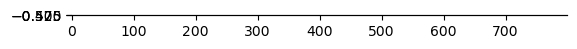

In [30]:
# plt.imshow(img_array[32600:27400:-1, 2800:3600], cmap='gray', origin='lower')